In [1]:
import pandas as pd
import numpy as np

import json

import matplotlib.pyplot as plt

## Data Loading and Initial Preparation

The goal of this step is to load, explore, and preprocess the UlyssesNER dataset, which contains annotated legislative texts. This foundational step prepares the data to be used in weak supervision by transforming raw JSON structures into structured representations (such as IOB tagging) and enabling easy manipulation and analysis.

- The dataset is provided in JSON format with fields: sentences, tokens, and ner_tokens.

- The IOB (Inside-Outside-Beginning) format is used to annotate named entities, a standard representation for NER tasks.

- Understanding label distributions and sentence lengths is crucial due to the legislative domain's complexity and formality.

In [2]:
df_train = pd.read_json("./data/train.json", orient="records")

df_dev = pd.read_json("./data/dev.json", orient="records")

df_test = pd.read_json("./data/test.json", orient="records")

In [3]:
df_train

,sentences,tokens,ner_tokens
0,"sala das sessões , em de de 2019 .","[sala, das, sessões, ,, em, de, de, 2019, .]","[O, O, O, O, O, O, O, B-DATA, O]"
1,da decisão de que trata o § 12 deste artigo ca...,"[da, decisão, de, que, trata, o, §, 12, deste,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,"projeto de lei n.º , de 2017 ( do sr .","[projeto, de, lei, n.º, ,, de, 2017, (, do, sr...","[O, O, O, O, O, O, B-DATA, O, O, O, O]"
3,deputado maurício dziedricki p l n .4 6 1 5 / ...,"[deputado, maurício, dziedricki, p, l, n, .4, ...","[B-PESSOA, B-PESSOA, I-PESSOA, O, O, O, O, O, ..."
4,art . 4º esta lei entra em vigor na data de su...,"[art, ., 4º, esta, lei, entra, em, vigor, na, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
...,...,...,...
1755,"trata-se de um projeto de grande utilidade , p...","[trata-se, de, um, projeto, de, grande, utilid...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1756,paulo wagner ) dispõe sobre o programa escola ...,"[paulo, wagner, ), dispõe, sobre, o, programa,...","[B-PESSOA, I-PESSOA, O, O, O, O, B-PRODUTODELE..."
1757,iracema portella ) dispõe sobre abertura de li...,"[iracema, portella, ), dispõe, sobre, abertura...","[B-PESSOA, I-PESSOA, O, O, O, O, O, O, O, O, O..."
1758,arnaldo faria de sá deputado federal – são pau...,"[arnaldo, faria, de, sá, deputado, federal, –,...","[B-PESSOA, I-PESSOA, I-PESSOA, I-PESSOA, B-PES..."


In [4]:
df_train.shape, df_dev.shape, df_test.shape

((1760, 3), (140, 3), (592, 3))

In [5]:
print(df_dev.iloc[0]["sentences"])

art . 3º esta lei entra em vigor na data de sua publicação .


In [6]:
def create_iob_labels(df):
    df['label_iob'] = df.apply(lambda row: list(zip(row['tokens'], row['ner_tokens'])), axis=1)
    return df

df_train = create_iob_labels(df_train)
df_dev = create_iob_labels(df_dev)
df_test = create_iob_labels(df_test)

print("Primeiras linhas de df_train com a nova coluna 'label_iob':")
display(df_train.head())

Primeiras linhas de df_train com a nova coluna 'label_iob':


,sentences,tokens,ner_tokens,label_iob
0,"sala das sessões , em de de 2019 .","[sala, das, sessões, ,, em, de, de, 2019, .]","[O, O, O, O, O, O, O, B-DATA, O]","[(sala, O), (das, O), (sessões, O), (,, O), (e..."
1,da decisão de que trata o § 12 deste artigo ca...,"[da, decisão, de, que, trata, o, §, 12, deste,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[(da, O), (decisão, O), (de, O), (que, O), (tr..."
2,"projeto de lei n.º , de 2017 ( do sr .","[projeto, de, lei, n.º, ,, de, 2017, (, do, sr...","[O, O, O, O, O, O, B-DATA, O, O, O, O]","[(projeto, O), (de, O), (lei, O), (n.º, O), (,..."
3,deputado maurício dziedricki p l n .4 6 1 5 / ...,"[deputado, maurício, dziedricki, p, l, n, .4, ...","[B-PESSOA, B-PESSOA, I-PESSOA, O, O, O, O, O, ...","[(deputado, B-PESSOA), (maurício, B-PESSOA), (..."
4,art . 4º esta lei entra em vigor na data de su...,"[art, ., 4º, esta, lei, entra, em, vigor, na, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[(art, O), (., O), (4º, O), (esta, O), (lei, O..."


In [7]:
all_ner_tokens = []
for ner_tokens_list in df_train['ner_tokens']:
    all_ner_tokens.extend(ner_tokens_list)
for ner_tokens_list in df_dev['ner_tokens']:
    all_ner_tokens.extend(ner_tokens_list)
for ner_tokens_list in df_test['ner_tokens']:
    all_ner_tokens.extend(ner_tokens_list)

unique_labels = set(all_ner_tokens) - set("O")
sorted_labels = sorted(list(unique_labels))

print("\nLabels únicas presentes nos datasets:")
print(sorted_labels)


Labels únicas presentes nos datasets:
['B-DATA', 'B-EVENTO', 'B-FUNDAMENTO', 'B-LOCAL', 'B-ORGANIZACAO', 'B-PESSOA', 'B-PRODUTODELEI', 'I-DATA', 'I-EVENTO', 'I-FUNDAMENTO', 'I-LOCAL', 'I-ORGANIZACAO', 'I-PESSOA', 'I-PRODUTODELEI']


### Analysis of label distribution

Frequência de cada label IOB:


B-DATA              363
B-EVENTO             14
B-FUNDAMENTO        597
B-LOCAL             533
B-ORGANIZACAO       516
B-PESSOA            744
B-PRODUTODELEI      269
I-DATA              280
I-EVENTO             35
I-FUNDAMENTO       4929
I-LOCAL             591
I-ORGANIZACAO      1072
I-PESSOA            561
I-PRODUTODELEI     1032
O                 96239
dtype: int64

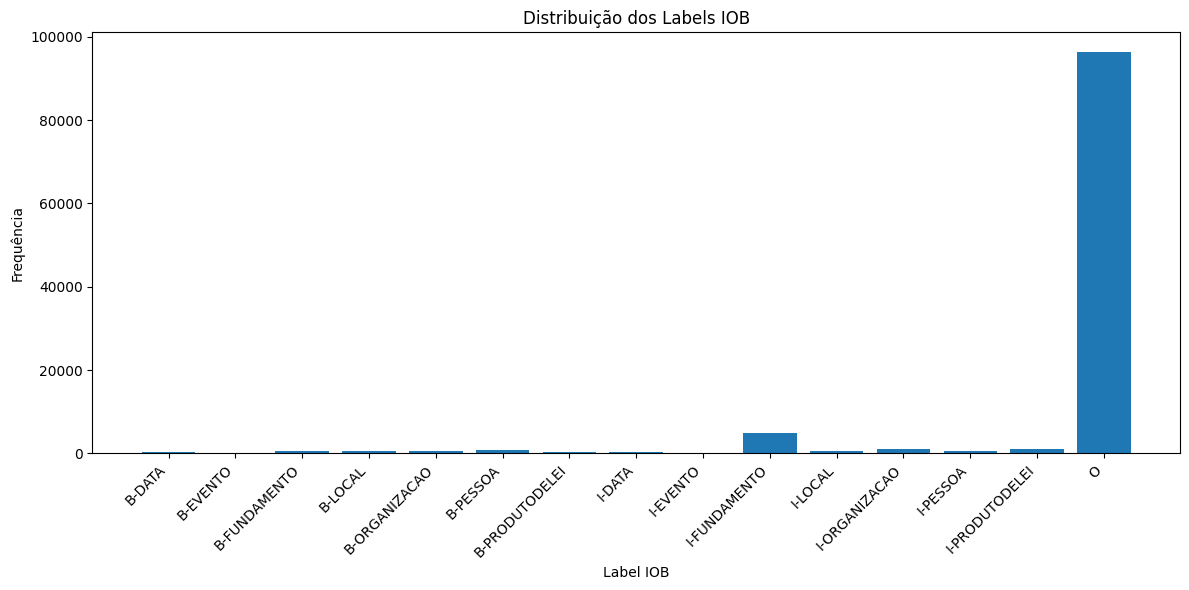


Frequência de cada categoria de entidade:


DATA             643
EVENTO            49
FUNDAMENTO      5526
LOCAL           1124
ORGANIZACAO     1588
PESSOA          1305
PRODUTODELEI    1301
dtype: int64

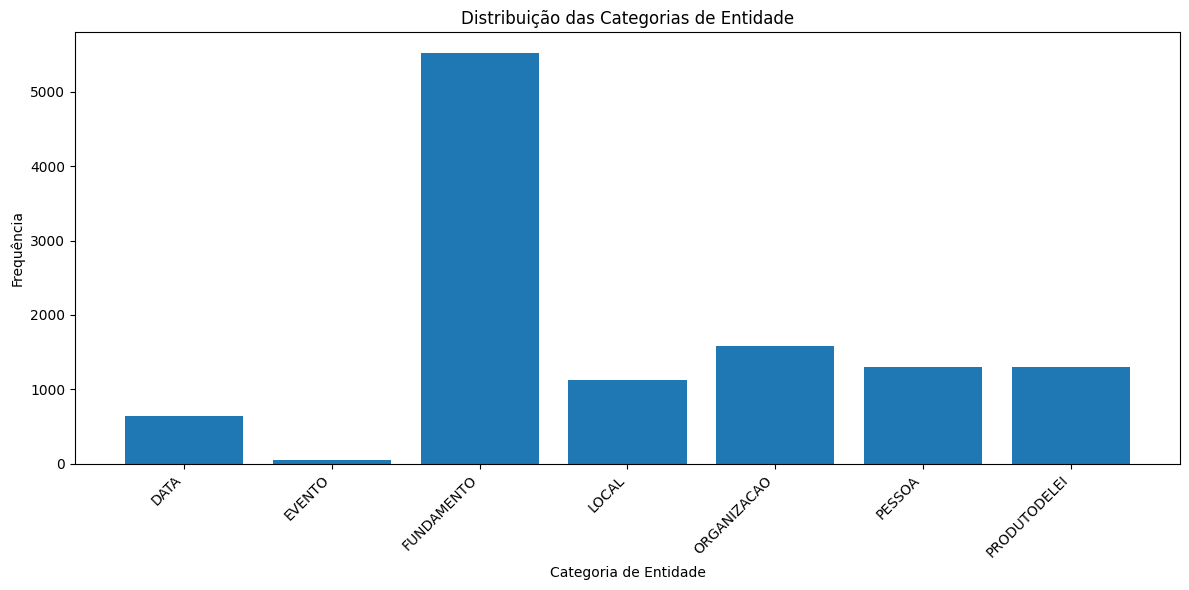

In [8]:
from collections import Counter

all_iob_labels = []
for df in [df_train, df_dev, df_test]:
    for ner_tokens_list in df['ner_tokens']:
        all_iob_labels.extend(ner_tokens_list)

iob_label_counts = Counter(all_iob_labels)
iob_label_counts_series = pd.Series(iob_label_counts).sort_index()

entity_categories = [label.split('-')[-1] for label in all_iob_labels if label != 'O']
entity_category_counts = Counter(entity_categories)
entity_category_counts_series = pd.Series(entity_category_counts).sort_index()

print("Frequência de cada label IOB:")
display(iob_label_counts_series)

# Plot IOB label distribution
plt.figure(figsize=(12, 6))
plt.bar(iob_label_counts_series.index, iob_label_counts_series.values)
plt.title("Distribuição dos Labels IOB")
plt.xlabel("Label IOB")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nFrequência de cada categoria de entidade:")
display(entity_category_counts_series)

# Plot entity category distribution
plt.figure(figsize=(12, 6))
plt.bar(entity_category_counts_series.index, entity_category_counts_series.values)
plt.title("Distribuição das Categorias de Entidade")
plt.xlabel("Categoria de Entidade")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis of the number of tokens per sentence

Estatísticas descritivas para o número de tokens por sentença:


count    2492.000000
mean       43.248395
std        34.960775
min         2.000000
25%        22.000000
50%        35.000000
75%        52.000000
max       438.000000
Name: num_tokens, dtype: float64

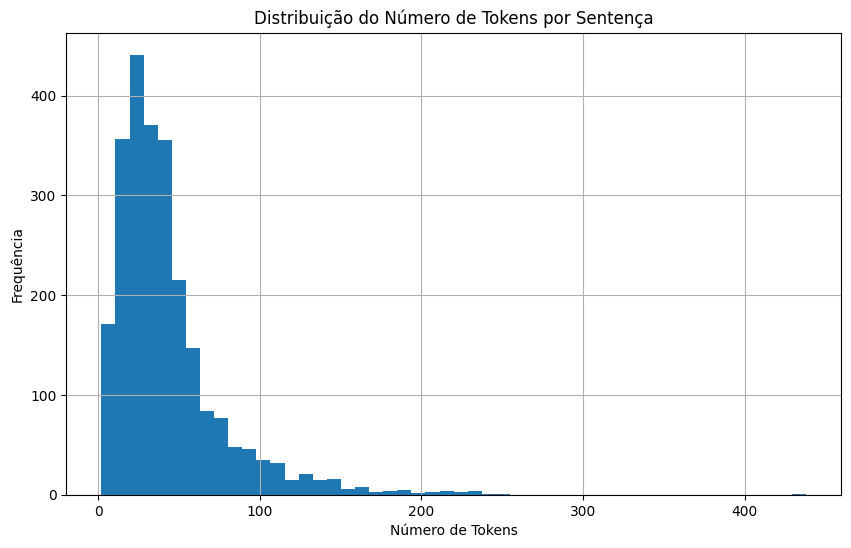

In [9]:
df_train['num_tokens'] = df_train['tokens'].apply(len)
df_dev['num_tokens'] = df_dev['tokens'].apply(len)
df_test['num_tokens'] = df_test['tokens'].apply(len)

all_num_tokens = pd.concat([df_train['num_tokens'], df_dev['num_tokens'], df_test['num_tokens']])

print("Estatísticas descritivas para o número de tokens por sentença:")
display(all_num_tokens.describe())

all_num_tokens.hist(bins=50, figsize=(10, 6))
plt.title('Distribuição do Número de Tokens por Sentença')
plt.xlabel('Número de Tokens')
plt.ylabel('Frequência')
plt.show()

### Analysis of the context of entities

In [10]:
def print_entity_examples(df, df_name, num_examples=5):
    """Prints examples of sentences containing entities from a dataframe."""
    print(f"\nExemplos de sentenças com entidades em {df_name}:")
    count = 0
    for index, row in df.iterrows():
        if count >= num_examples:
            break
        # Check if any ner_token is not 'O'
        if any(label != 'O' for label in row['ner_tokens']):
            print(f"\nSentença: {row['sentences']}")
            print(f"Labels IOB: {row['label_iob']}")
            count += 1

print_entity_examples(df_train, "df_train", num_examples=5)
print_entity_examples(df_dev, "df_dev", num_examples=5)


Exemplos de sentenças com entidades em df_train:

Sentença: sala das sessões , em de de 2019 .
Labels IOB: [('sala', 'O'), ('das', 'O'), ('sessões', 'O'), (',', 'O'), ('em', 'O'), ('de', 'O'), ('de', 'O'), ('2019', 'B-DATA'), ('.', 'O')]

Sentença: projeto de lei n.º , de 2017 ( do sr .
Labels IOB: [('projeto', 'O'), ('de', 'O'), ('lei', 'O'), ('n.º', 'O'), (',', 'O'), ('de', 'O'), ('2017', 'B-DATA'), ('(', 'O'), ('do', 'O'), ('sr', 'O'), ('.', 'O')]

Sentença: deputado maurício dziedricki p l n .4 6 1 5 / 2 0 1 9 a p re s e n ta ç ã o : 2 1 / 0 8 / 2 0 1 9 1 4 : 1 6
Labels IOB: [('deputado', 'B-PESSOA'), ('maurício', 'B-PESSOA'), ('dziedricki', 'I-PESSOA'), ('p', 'O'), ('l', 'O'), ('n', 'O'), ('.4', 'O'), ('6', 'O'), ('1', 'O'), ('5', 'O'), ('/', 'O'), ('2', 'O'), ('0', 'O'), ('1', 'O'), ('9', 'O'), ('a', 'O'), ('p', 'O'), ('re', 'O'), ('s', 'O'), ('e', 'O'), ('n', 'O'), ('ta', 'O'), ('ç', 'O'), ('ã', 'O'), ('o', 'O'), (':', 'O'), ('2', 'O'), ('1', 'O'), ('/', 'O'), ('0', 'O'), ('8',

## Summary

### 1. Label Distribution
- The most frequent IOB labels are ‘O’ (outside entity), followed by ‘I-FUNDAMENTO’ and ‘I-ORGANIZACAO’.
- The most common entity categories are ‘FUNDAMENTO’, ‘ORGANIZACAO’, and ‘PESSOA’.

### 2. Sentence and Token Size
- Sentences vary significantly in size, from a minimum of 2 to a maximum of 438 tokens.
- The average number of tokens per sentence is approximately 43.25, with a median of 35, indicating a skewed distribution toward shorter sentences.
- Most sentences have a relatively small number of tokens, although there are some considerably long sentences.

### 3. Context of Entities
- Entities appear in a variety of contexts, often related to laws, projects, dates, names of people, and organizations.
- Entities such as ‘FUNDAMENTO’ (laws, articles, etc.) are common in legal and regulatory texts.
- Entities ‘PESSOA’ and ‘ORGANIZACAO’ appear in contexts related to project authors, government agencies, etc.
- Entities ‘DATA’ are used to specify dates of documents or events.

In [11]:
df_train

,sentences,tokens,ner_tokens,label_iob,num_tokens
0,"sala das sessões , em de de 2019 .","[sala, das, sessões, ,, em, de, de, 2019, .]","[O, O, O, O, O, O, O, B-DATA, O]","[(sala, O), (das, O), (sessões, O), (,, O), (e...",9
1,da decisão de que trata o § 12 deste artigo ca...,"[da, decisão, de, que, trata, o, §, 12, deste,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[(da, O), (decisão, O), (de, O), (que, O), (tr...",17
2,"projeto de lei n.º , de 2017 ( do sr .","[projeto, de, lei, n.º, ,, de, 2017, (, do, sr...","[O, O, O, O, O, O, B-DATA, O, O, O, O]","[(projeto, O), (de, O), (lei, O), (n.º, O), (,...",11
3,deputado maurício dziedricki p l n .4 6 1 5 / ...,"[deputado, maurício, dziedricki, p, l, n, .4, ...","[B-PESSOA, B-PESSOA, I-PESSOA, O, O, O, O, O, ...","[(deputado, B-PESSOA), (maurício, B-PESSOA), (...",41
4,art . 4º esta lei entra em vigor na data de su...,"[art, ., 4º, esta, lei, entra, em, vigor, na, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[(art, O), (., O), (4º, O), (esta, O), (lei, O...",14
...,...,...,...,...,...
1755,"trata-se de um projeto de grande utilidade , p...","[trata-se, de, um, projeto, de, grande, utilid...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[(trata-se, O), (de, O), (um, O), (projeto, O)...",29
1756,paulo wagner ) dispõe sobre o programa escola ...,"[paulo, wagner, ), dispõe, sobre, o, programa,...","[B-PESSOA, I-PESSOA, O, O, O, O, B-PRODUTODELE...","[(paulo, B-PESSOA), (wagner, I-PESSOA), (), O)...",17
1757,iracema portella ) dispõe sobre abertura de li...,"[iracema, portella, ), dispõe, sobre, abertura...","[B-PESSOA, I-PESSOA, O, O, O, O, O, O, O, O, O...","[(iracema, B-PESSOA), (portella, I-PESSOA), ()...",22
1758,arnaldo faria de sá deputado federal – são pau...,"[arnaldo, faria, de, sá, deputado, federal, –,...","[B-PESSOA, I-PESSOA, I-PESSOA, I-PESSOA, B-PES...","[(arnaldo, B-PESSOA), (faria, I-PESSOA), (de, ...",37


The ORGANIZATION class has been removed so that we can work with it in recognizing named entities.

In [130]:
# Filter out rows where 'ner_tokens' contains any 'B-ORGANIZACAO' or 'I-ORGANIZACAO' labels
df_train_filtered = df_train[~df_train['ner_tokens'].apply(lambda tokens: any('ORGANIZACAO' in label for label in tokens))].copy().reset_index(drop=True)

print("Número de sentenças no df_train original:", len(df_train))
print("Número de sentenças no df_train_filtered (sem 'ORGANIZACAO'):", len(df_train_filtered))

# Display the first few rows of the filtered DataFrame to confirm
print("\nPrimeiras linhas do df_train_filtered:")
display(df_train_filtered.head())

Número de sentenças no df_train original: 1760
Número de sentenças no df_train_filtered (sem 'ORGANIZACAO'): 1478

Primeiras linhas do df_train_filtered:


,sentences,tokens,ner_tokens,label_iob,num_tokens
0,"sala das sessões , em de de 2019 .","[sala, das, sessões, ,, em, de, de, 2019, .]","[O, O, O, O, O, O, O, B-DATA, O]","[(sala, O), (das, O), (sessões, O), (,, O), (e...",9
1,da decisão de que trata o § 12 deste artigo ca...,"[da, decisão, de, que, trata, o, §, 12, deste,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[(da, O), (decisão, O), (de, O), (que, O), (tr...",17
2,"projeto de lei n.º , de 2017 ( do sr .","[projeto, de, lei, n.º, ,, de, 2017, (, do, sr...","[O, O, O, O, O, O, B-DATA, O, O, O, O]","[(projeto, O), (de, O), (lei, O), (n.º, O), (,...",11
3,deputado maurício dziedricki p l n .4 6 1 5 / ...,"[deputado, maurício, dziedricki, p, l, n, .4, ...","[B-PESSOA, B-PESSOA, I-PESSOA, O, O, O, O, O, ...","[(deputado, B-PESSOA), (maurício, B-PESSOA), (...",41
4,art . 4º esta lei entra em vigor na data de su...,"[art, ., 4º, esta, lei, entra, em, vigor, na, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[(art, O), (., O), (4º, O), (esta, O), (lei, O...",14


Apparently, the texts are all lowercase, but to be sure, let's apply `.lower()`.

In [13]:
df_train_filtered["sentences"] = df_train_filtered["sentences"].str.lower()

## Step 1 - Convert Text Data to Spacy Doc Objects

To start the skweak workflow, I converted the raw text data into spaCy Doc objects. This is necessary because skweak operates on spaCy’s format, which includes efficient tokenization and linguistic annotations used in the labeling process.

In [ ]:
# Import the spaCy library for natural language processing
# spaCy provides tools for tokenization, part-of-speech tagging, named entity recognition, and more
import spacy

# Import the skweak library for weak supervision
# skweak allows us to combine multiple weak supervision sources to create high-quality training data
import skweak

# Load the spaCy model for Portuguese
# 'pt_core_news_lg' is a large model with more accuracy and features
# You can also use 'pt_core_news_sm' for a smaller, faster model with fewer features
nlp = spacy.load("pt_core_news_lg")

In [15]:
# Process the training dataset using the spaCy pipeline
# The nlp.pipe method processes the text in batches, which is more efficient than processing each text individually
# df_train['text'].values contains the text data from the training dataset
spacy_docs_train = list(nlp.pipe(df_train_filtered["sentences"].values))

# # Process the validation dataset using the spaCy pipeline
# # df_dev['text'].values contains the text data from the validation dataset
spacy_docs_dev = list(nlp.pipe(df_dev["sentences"].values))

# # Process the test dataset using the spaCy pipeline
# # df_test['text'].values contains the text data from the test dataset
spacy_docs_test = list(nlp.pipe(df_test["sentences"].values))

# Save the processed spaCy documents to disk
# This avoids the need to run the spaCy pipeline again, saving time in future runs
# skweak.utils.docbin_writer writes the spaCy documents to a binary file
# The first argument is the list of spaCy documents, and the second argument is the file path
skweak.utils.docbin_writer(spacy_docs_train, "data/bin/ner/spacy_docs_train.bin")
skweak.utils.docbin_writer(spacy_docs_dev, "data/bin/ner/spacy_docs_dev.bin")
skweak.utils.docbin_writer(spacy_docs_test, "data/bin/ner/spacy_docs_test.bin")

Write to data/bin/ner/spacy_docs_train.bin...done
Write to data/bin/ner/spacy_docs_dev.bin...done
Write to data/bin/ner/spacy_docs_test.bin...done


In [16]:
# Load the processed spaCy documents from disk
# This avoids the need to run the spaCy pipeline again, saving time in future runs
# skweak.utils.docbin_reader reads the spaCy documents from a binary file
# The first argument is the file path, and the second argument is the name of the spaCy model used for processing

# Load the training documents
spacy_docs_train = skweak.utils.docbin_reader("data/bin/ner/spacy_docs_train.bin", spacy_model_name="pt_core_news_lg")

# Load the validation documents
spacy_docs_dev = skweak.utils.docbin_reader("data/bin/ner/spacy_docs_dev.bin", spacy_model_name="pt_core_news_lg")

# Load the test documents
spacy_docs_test = skweak.utils.docbin_reader("data/bin/ner/spacy_docs_test.bin", spacy_model_name="pt_core_news_lg")

# Convert the loaded documents to lists
# This step ensures that the documents are in a list format, which is easier to work with in subsequent steps
spacy_docs_train = list(spacy_docs_train)
spacy_docs_dev = list(spacy_docs_dev)
spacy_docs_test = list(spacy_docs_test)

In [17]:
spacy_docs_train[:15]

[sala das sessões , em de de 2019 .,
 da decisão de que trata o § 12 deste artigo caberá recurso administrativo com efeito suspensivo .,
 projeto de lei n.º , de 2017 ( do sr .,
 deputado maurício dziedricki p l n .4 6 1 5 / 2 0 1 9 a p re s e n ta ç ã o : 2 1 / 0 8 / 2 0 1 9 1 4 : 1 6,
 art . 4º esta lei entra em vigor na data de sua publicação .,
 com o forte crescimento da população idosa masculina no país , a perspectiva é a de crescimento vertiginoso dos casos de câncer de próstata , conforme já constatado pelas estatísticas disponíveis .,
 a câmara dos deputados resolve : art . 1º esta resolução dá denominação ao plenário 2 , do anexo ii , da câmara dos deputados .,
 art . 2º as normas regulamentadoras definirão as estratégias para o cumprimento desta determinação , disciplinando sobre os participantes , pessoas físicas ou jurídicas , priorizando para temas voltados para a prevenção de acidentes de trânsito , levando em consideração os aspectos humanos e comportamentais .,
 os po

# Step 2 - Define Labeling Functions

In this step, I implemented labeling functions to automatically assign weak labels to entities. Each function receives a spaCy Doc and returns spans with labels, working at the token level. This allows efficient annotation without manual effort and is essential for weak supervision in NER tasks.

### 2.1 Using a predefined list of possible organizations (gazetteer)

As a first labeling function, I used a predefined list of Brazilian organizations (a gazetteer) to identify known entity names in the text. This is a simple and effective rule-based method for detecting entities like public institutions and political parties.

In [18]:
organizacoes_gazetteer = [
    # Órgãos públicos federais
    "Câmara dos Deputados",
    "Congresso Nacional",
    "Senado Federal",
    "Presidência da República",
    "Supremo Tribunal Federal",
    "STF",
    "Superior Tribunal de Justiça",
    "STJ",
    "Tribunal Superior Eleitoral",
    "TSE",
    "Tribunal de Contas da União",
    "TCU",
    "Ministério Público Federal",
    "MPF",
    "Advocacia-Geral da União",
    "Advocacia Geral da União",
    "AGU",
    "Controladoria-Geral da União",
    "Controladoria Geral da União",
    "CGU",
    "Banco Central do Brasil",
    "Banco Central",
    "Instituto Brasileiro de Geografia e Estatística",
    "IBGE",
    "Anatel",
    "Agência Nacional de Águas",
    "ANA",
    "Agência Nacional de Vigilância Sanitária",
    "Anvisa",
    "Agência Nacional de Energia Elétrica",
    "ANEEL",
    "Instituto Nacional do Seguro Social",
    "INSS",
    "Fundação Oswaldo Cruz",
    "Fiocruz",
    "Empresa Brasileira de Pesquisa Agropecuária",
    "Embrapa",
    "Fundação Biblioteca Nacional",
    # Ministérios
    "Ministério da Saúde",
    "Ministério da Educação",
    "Ministério da Fazenda",
    "Ministério do Trabalho",
    "Ministério da Justiça",
    "Ministério da Cidadania",
    "Ministério da Agricultura",
    "Ministério do Meio Ambiente",
    "Ministério da Infraestrutura",
    "Ministério da Economia",
    "Ministério da Defesa",
    "Ministério das Relações Exteriores",
    # Empresas estatais e autarquias
    "Petrobras",
    "Caixa Econômica Federal",
    "Caixa",
    "Banco do Brasil",
    "Correios",
    "Empresa Brasileira de Correios e Telégrafos",
    "BNDES",
    "Banco Nacional de Desenvolvimento Econômico e Social",
    "Eletrobras",
    "Infraero",
    "Telebras",
    "Embraer",
    "VALE",
    "Companhia Vale do Rio Doce",
    "Conab",
    "Companhia Nacional de Abastecimento",
    "Ceagesp",
    # Partidos políticos
    "Partido dos Trabalhadores",
    "PT",
    "Partido da Social Democracia Brasileira",
    "PSDB",
    "Movimento Democrático Brasileiro",
    "MDB",
    "Partido Liberal",
    "PL",
    "Partido Progressistas",
    "PP",
    "União Brasil",
    "Partido Socialista Brasileiro",
    "PSB",
    "Partido Democrático Trabalhista",
    "PDT",
    "Republicanos",
    "Partido Comunista do Brasil",
    "PCdoB",
    "Partido Socialista dos Trabalhadores Unificado",
    "PSTU",
    "Partido Novo",
    "Rede Sustentabilidade",
    "Solidariedade",
    "Partido Verde",
    "PV",
    "Cidadania",
    # Sindicatos, federações e confederações
    "Central Única dos Trabalhadores",
    "CUT",
    "Força Sindical",
    "União Geral dos Trabalhadores",
    "UGT",
    "Nova Central Sindical de Trabalhadores",
    "NCST",
    "Central dos Sindicatos Brasileiros",
    "CSB",
    "Confederação Nacional dos Trabalhadores em Educação",
    "CNTE",
    "Confederação Nacional dos Metalúrgicos",
    "CNM",
    "Federação Nacional dos Jornalistas",
    "FENAJ",
    "Sindicato Nacional dos Auditores Fiscais do Trabalho",
    "Sinait",
    # Associações profissionais e comerciais
    "Ordem dos Advogados do Brasil",
    "OAB",
    "Federação das Indústrias do Estado de São Paulo",
    "FIESP",
    "Associação Brasileira de Municípios",
    "ABM",
    "Associação Brasileira das Empresas de Tecnologia da Informação e Comunicação",
    "Brasscom",
    "Associação Brasileira de Antropologia",
    "Associação Brasileira de Editores Científicos",
    "Associação Nacional dos Magistrados da Justiça do Trabalho",
    "Anamatra",
    "Associação Brasileira da Indústria de Máquinas e Equipamentos",
    "Abimaq",
    # Universidades e institutos federais
    "Universidade de São Paulo",
    "USP",
    "Universidade Federal do Rio de Janeiro",
    "UFRJ",
    "Universidade de Brasília",
    "UnB",
    # Entidades internacionais
    "Organização das Nações Unidas",
    "ONU",
    "Organização Mundial da Saúde",
    "OMS",
    "Mercosul",
    "Organização Internacional do Trabalho",
    "OIT",
    "Banco Mundial",
]


In [19]:
from helpers.text import remove_accented_characters

# Remove accented characters from each organization name
# This is useful for standardizing the organization names for further processing
organizacoes_gazetteer.extend([remove_accented_characters(d) for d in organizacoes_gazetteer])

# Remove duplicates by converting the list to a set and back to a list
# This ensures that each organization name appears only once in the list
organizacoes_gazetteer = list(set(organizacoes_gazetteer))

print(f"Quantidade de organizações listadas: {len(organizacoes_gazetteer)}\n")

# Display the first 10 organization names
# This is useful for quickly checking the contents of the list
organizacoes_gazetteer[:10]

Quantidade de organizações listadas: 190



['CSB',
 'Confederacao Nacional dos Metalurgicos',
 'CNTE',
 'Uniao Brasil',
 'Ministerio Publico Federal',
 'Ministério da Economia',
 'USP',
 'Ministério do Meio Ambiente',
 'Ordem dos Advogados do Brasil',
 'Associacao Nacional dos Magistrados da Justica do Trabalho']

In [20]:
# Convert all organization names to lowercase
# This ensures that the comparison of organization names is case-insensitive
# The list comprehension iterates over each organization name in the 'organizacoes' list and converts it to lowercase
organizacoes_gazetteer = [d.lower() for d in organizacoes_gazetteer]

# Remove duplicate organization names
# The set() function removes duplicates by converting the list to a set, which only keeps unique elements
# The list() function converts the set back to a list
organizacoes_gazetteer = list(set(organizacoes_gazetteer))

# Display the first 10 organization names
# This allows us to inspect a sample of the processed organization names
# The slicing operation [:10] retrieves the first 10 elements from the 'organizacoes' list
organizacoes_gazetteer[:10]

['fenaj',
 'ministerio do trabalho',
 'brasscom',
 'agencia nacional de vigilancia sanitaria',
 'controladoria-geral da união',
 'uniao brasil',
 'ministerio da educacao',
 'presidência da república',
 'controladoria-geral da uniao',
 'fundação oswaldo cruz']

In [ ]:
# Import the json module to handle JSON data
import json

# Initialize an empty dictionary to store the organizations names
json_organizations = {}

# Add the list of organizations names to the dictionary under the key 'ORGANIZACAO'
json_organizations["ORGANIZACAO"] = organizacoes_gazetteer

# Save the dictionary as a JSON file
# The ensure_ascii=False parameter allows for non-ASCII characters to be saved correctly
# The indent=4 parameter makes the JSON file more readable by adding indentation
with open("data/ner/organizations_gazetteer.json", "w") as f:
    json.dump(json_organizations, f, ensure_ascii=False, indent=4)

# Load the JSON file into a gazetteer for weak supervision
# The extract_json_data function reads the JSON file and prepares it for use with skweak
tries_organizations = skweak.gazetteers.extract_json_data("data/ner/organizations_gazetteer.json", spacy_model="pt_core_news_lg")

# Create a GazetteerAnnotator for labeling the data
# The GazetteerAnnotator uses the gazetteer to annotate text with organization names
# The case_sensitive=False parameter makes the annotation case-insensitive
lf_organizations_gazetteer = skweak.gazetteers.GazetteerAnnotator("organizations_gazetteer", tries_organizations, case_sensitive=False)

Extracting data from data/ner/organizations_gazetteer.json
Populating trie for class ORGANIZACAO (number: 190)


In [ ]:
# It is important to document and highlight that the error below occurs due to updates in the latest versions of IPython.
# The correction made was as follows:

# First import: `from IPython.display import display, HTML`

# The change was in skweak.utils.display_entities, last two lines of the function:
# ipython_html = HTML(‘<span class="tex2jax_ignore">{}</span>’.format(html))
# return display(ipython_html)

%load_ext autoreload
%autoreload 2

In [23]:
# Define a sample text containing organization names for testing the function
text = "a câmara dos deputados resolve : art . 1º esta resolução dá denominação ao plenário 2 , do anexo ii , da câmara dos deputados ."

# Process the text using the spaCy NLP pipeline
# This step tokenizes the text and applies linguistic annotations
doc = nlp(text)

# Apply the GazetteerAnnotator to the processed text
# This annotates the text with organization names using the gazetteer
lf_organizations_gazetteer(doc)

# Display the annotated entities in the text
# This function highlights the recognized organization names in the text for visualization
skweak.utils.display_entities(doc, "organizations_gazetteer")

# You may get an error on this cell due to IPython recent changes in the display functionality.  You may need to edit skweak utils to fix it. Check the error message and edit the appropriate file inside your virtual environment

In [ ]:
# Select a sample of 50 documents from the training set
for doc in pd.Series(spacy_docs_train).sample(50):

    # Apply the GazetteerAnnotator to the selected document
    # This annotates the document with organizations names using the gazetteer
    lf_organizations_gazetteer(doc)

    # Display the annotated entities in the document
    # This function highlights the recognized organizations names in the document for visualization
    skweak.utils.display_entities(doc, "organizations_gazetteer")

## 2.2 Utilizing Pretrained Transformer Models for Labeling Functions
In this step, I used a pretrained NER model from Hugging Face to create a labeling function. Instead of relying on rules, the model predicts organization entities based on its prior training on large Portuguese corpora. This adds a data-driven layer to the weak supervision process.

In [ ]:
# Import the pipeline function from the transformers library
# This function is used to create a NER pipeline
from transformers import pipeline
import torch

# Create an NER pipeline using a pre-trained model for organization entities
# The aggregation_strategy="first" parameter ensures that only the first sub-token of a word is used for entity recognition
# The device=-1 parameter indicates that the pipeline should run on the CPU (use 0 or a positive integer for GPU)
ner_pipeline = pipeline("ner", model="pierreguillou/ner-bert-large-cased-pt-lenerbr", aggregation_strategy="first", device=0)

# Apply the NER pipeline to the text of the spaCy document
# This step performs named entity recognition on the text, identifying organization entities
ner_results = ner_pipeline(doc.text)

# Display the NER results
# This will show the recognized organization entities along with their positions and labels
print(ner_results)

/home/user/joao/ner-weak-supervision/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity_group': 'LEGISLACAO', 'score': np.float32(0.99768925), 'word': 'art. 44, da lei nº 9. 474', 'start': 495, 'end': 521}, {'entity_group': 'TEMPO', 'score': np.float32(0.99957526), 'word': '22 de julho de 1997', 'start': 527, 'end': 546}]


The choice of the transformer `pierreguillou/ner-bert-large-cased-pt-lenerbr` was the result of tests to find out what could best label ORGANIZACAO. Other transformers such as the one below were tested:

- `marcosgg/bert-large-pt-ner-enamex`
- `monilouise/ner_news_portuguese`
- One or two others that I forgot to note

Another change was needed in the spacy library within venv.

```
Import from line 69 in spacy.displacy. __init__ .py
from IPython.display import HTML, display
```

In [ ]:
from helpers.ner import render_entity_data_from_pipeline

# Define a sample text containing organization names for testing the NER pipeline
sample_text = "Texto de teste na câmara dos deputados, a agu e o tribunal de contas da união, na companhia vale do rio doce (VALE), na petrobras e no PSDB"

# Apply the NER pipeline to the sample text
# This step performs named entity recognition on the text, identifying organization entities
ner_results = ner_pipeline(sample_text)

# Render the annotated entities in the sample text
# This function highlights the recognized organization entities in the text for visualization
render_entity_data_from_pipeline(sample_text, ner_results)

In [27]:
df_lf_transfomer_1 = pd.DataFrame([doc.text for doc in spacy_docs_train], columns=["text"])
df_lf_transfomer_1

,text
0,"sala das sessões , em de de 2019 ."
1,da decisão de que trata o § 12 deste artigo ca...
2,"projeto de lei n.º , de 2017 ( do sr ."
3,deputado maurício dziedricki p l n .4 6 1 5 / ...
4,art . 4º esta lei entra em vigor na data de su...
...,...
1473,"trata-se de um projeto de grande utilidade , p..."
1474,paulo wagner ) dispõe sobre o programa escola ...
1475,iracema portella ) dispõe sobre abertura de li...
1476,arnaldo faria de sá deputado federal – são pau...


In [28]:
df_lf_transfomer_1["weak_label"] = ner_pipeline(df_lf_transfomer_1.text.values.tolist())
df_lf_transfomer_1

,text,weak_label
0,"sala das sessões , em de de 2019 .","[{'entity_group': 'TEMPO', 'score': 0.9972467,..."
1,da decisão de que trata o § 12 deste artigo ca...,[]
2,"projeto de lei n.º , de 2017 ( do sr .","[{'entity_group': 'LEGISLACAO', 'score': 0.958..."
3,deputado maurício dziedricki p l n .4 6 1 5 / ...,"[{'entity_group': 'PESSOA', 'score': 0.9984737..."
4,art . 4º esta lei entra em vigor na data de su...,[]
...,...,...
1473,"trata-se de um projeto de grande utilidade , p...",[]
1474,paulo wagner ) dispõe sobre o programa escola ...,"[{'entity_group': 'PESSOA', 'score': 0.9944211..."
1475,iracema portella ) dispõe sobre abertura de li...,"[{'entity_group': 'PESSOA', 'score': 0.8518268..."
1476,arnaldo faria de sá deputado federal – são pau...,"[{'entity_group': 'PESSOA', 'score': 0.9988308..."


In [29]:
import gc

ner_pipeline = None
gc.collect()
torch.cuda.empty_cache()

In [30]:
df_lf_transfomer_1["weak_label"].iloc[20]

[{'entity_group': 'ORGANIZACAO',
  'score': np.float32(0.9892431),
  'word': 'congresso nacional',
  'start': 2,
  'end': 20},
 {'entity_group': 'LEGISLACAO',
  'score': np.float32(0.9749722),
  'word': '3º ao art. 12 da lei nº 11. 947',
  'start': 62,
  'end': 93},
 {'entity_group': 'TEMPO',
  'score': np.float32(0.99938977),
  'word': '16 de junho de 2009',
  'start': 99,
  'end': 118}]

In [31]:
df_lf_transfomer_1["text"].iloc[20]

'o congresso nacional decreta : art . 1º esta lei acrescenta § 3º ao art . 12 da lei nº 11.947 , de 16 de junho de 2009 , para obrigar a inclusão do café e do leite nos cardápios da alimentação escolar .'

In [32]:
def filter_organizacao_entities(weak_labels):
    """
    Filtra apenas os objetos com entity_group == "ORGANIZACAO" em uma lista de entidades.

    Args:
        weak_labels (list): Lista de dicionários de entidades.

    Returns:
        list: Lista filtrada apenas com entidades do grupo "ORGANIZACAO".
    """
    if not isinstance(weak_labels, list):
        return []
    return [entity for entity in weak_labels if entity.get("entity_group") == "ORGANIZACAO"]


df_lf_transfomer_1["weak_label"] = df_lf_transfomer_1["weak_label"].apply(filter_organizacao_entities)

In [33]:
from helpers.ner import (
    DataFrameAnnotator,
) 

lf_transformer_1 = DataFrameAnnotator(
    annotator_name="lf_transformer_1",
    data_frame=df_lf_transfomer_1,  # The DataFrame containing the weak labels
    column_weak_label="weak_label",
    column_text="text",
    column_uid="uid",
    label_key_name="entity_group",
)

In [34]:
# Apply the TransformerNERAnnotator to the spaCy document
# This step annotates the document with named entities using the pre-trained model
lf_transformer_1(doc)

# Display the annotated entities in the document
# This function highlights the recognized entities in the document for visualization
skweak.utils.display_entities(doc, "lf_transformer_1")

## 2.3 Using Zero-Shot NER with GLiNER
To complement other approaches, I used GLiNER, a zero-shot NER model that can detect custom entity types without task-specific fine-tuning. It allows flexible identification of “organization” entities even when not explicitly seen during training, making it a lightweight alternative to large language models.

In [35]:
# Import the GLiNER class from the gliner library
# GLiNER is used for NER tasks
from gliner import GLiNER

# Import the helpers.ner module
# This module contains helper functions for NER tasks
import helpers.ner

# Load a pre-trained GLiNER model
# We'll use 3 different GLiNER flavours as Labeling Functions
# The from_pretrained method loads the model weights and configuration
model_gliner_llama = GLiNER.from_pretrained(
    "knowledgator/gliner-llama-1.3B-v1.0",
)

model_gliner_bi_large = GLiNER.from_pretrained(
    "knowledgator/gliner-bi-large-v1.0",
)

model_gliner_qwen = GLiNER.from_pretrained(
    "knowledgator/gliner-qwen-1.5B-v1.0",
)

model_gliner_x_small = GLiNER.from_pretrained(
    "knowledgator/gliner-x-small-v0.5",
)

model_gliner_llama = model_gliner_llama.half()
model_gliner_bi_large = model_gliner_bi_large.half()
model_gliner_qwen = model_gliner_qwen.half()
model_gliner_x_small = model_gliner_x_small.half()

Fetching 11 files: 100%|██████████| 11/11 [00:00<00:00, 22138.84it/s]
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
Fetching 12 files: 100%|██████████| 12/12 [00:00<00:00, 33112.93it/s]
/home/user/joao/ner-weak-supervision/venv/lib/python3.12/site-packages/gliner/model.py:92: UserWarning: Vocab size of the model (151648) does't match length of tokenizer (151649). 
                            You should to consider manually add new tokens to tokenizer or to load tokenizer with added

In [36]:
# Extract the text content from the spaCy document
# This text will be used as input for the GLiNER model
text = doc.text

# Define the list of labels to be recognized by the GLiNER model
# In this case, we are interested in recognizing entities labeled as 'organization'
labels = ["organization"]

In [37]:
# Use the GLiNER model to predict entities in the text
# The predict_entities method takes the text, labels, and a confidence threshold as input
# The threshold parameter specifies the minimum confidence score for an entity to be considered valid
result = model_gliner_llama.predict_entities(sample_text, labels, threshold=0.05)

# Display the prediction results
# This will show the recognized entities along with their positions and confidence scores
print(result)

# Render the annotated entities in the text using the helpers.ner module
helpers.ner.render_entity_data_from_pipeline(sample_text, result, label_key_name="label")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'start': 72, 'end': 77, 'text': 'união', 'label': 'organization', 'score': 0.05291748046875}, {'start': 110, 'end': 114, 'text': 'VALE', 'label': 'organization', 'score': 0.0552978515625}, {'start': 135, 'end': 139, 'text': 'PSDB', 'label': 'organization', 'score': 0.168212890625}]


In [38]:
# Use the GLiNER model to predict entities in the text
# The predict_entities method takes the text, labels, and a confidence threshold as input
# The threshold parameter specifies the minimum confidence score for an entity to be considered valid
result = model_gliner_bi_large.predict_entities(sample_text, labels, threshold=0.4)

# Display the prediction results
# This will show the recognized entities along with their positions and confidence scores
print(result)

# Render the annotated entities in the text using the helpers.ner module
helpers.ner.render_entity_data_from_pipeline(sample_text, result, label_key_name="label")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'start': 18, 'end': 38, 'text': 'câmara dos deputados', 'label': 'organization', 'score': 0.51806640625}, {'start': 42, 'end': 45, 'text': 'agu', 'label': 'organization', 'score': 0.431884765625}, {'start': 50, 'end': 77, 'text': 'tribunal de contas da união', 'label': 'organization', 'score': 0.470458984375}, {'start': 82, 'end': 108, 'text': 'companhia vale do rio doce', 'label': 'organization', 'score': 0.492431640625}, {'start': 110, 'end': 114, 'text': 'VALE', 'label': 'organization', 'score': 0.43505859375}, {'start': 120, 'end': 129, 'text': 'petrobras', 'label': 'organization', 'score': 0.5673828125}, {'start': 135, 'end': 139, 'text': 'PSDB', 'label': 'organization', 'score': 0.47998046875}]


In [39]:
# Use the GLiNER model to predict entities in the text
# The predict_entities method takes the text, labels, and a confidence threshold as input
# The threshold parameter specifies the minimum confidence score for an entity to be considered valid
result = model_gliner_qwen.predict_entities(sample_text, labels, threshold=0.05)

# Display the prediction results
# This will show the recognized entities along with their positions and confidence scores
print(result)

# Render the annotated entities in the text using the helpers.ner module
helpers.ner.render_entity_data_from_pipeline(sample_text, result, label_key_name="label")

[]


In [40]:
# Use the GLiNER model to predict entities in the text
# The predict_entities method takes the text, labels, and a confidence threshold as input
# The threshold parameter specifies the minimum confidence score for an entity to be considered valid
result = model_gliner_x_small.predict_entities(sample_text, labels, threshold=0.4)

# Display the prediction results
# This will show the recognized entities along with their positions and confidence scores
print(result)

# Render the annotated entities in the text using the helpers.ner module
helpers.ner.render_entity_data_from_pipeline(sample_text, result, label_key_name="label")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'start': 92, 'end': 108, 'text': 'vale do rio doce', 'label': 'organization', 'score': 0.437744140625}, {'start': 110, 'end': 114, 'text': 'VALE', 'label': 'organization', 'score': 0.7509765625}, {'start': 135, 'end': 139, 'text': 'PSDB', 'label': 'organization', 'score': 0.9951171875}]


- The performance of gliner llama and gliner qwen was not good enough to be used in our label function

- I set the threshold to 0.4 because it was a good common result

- Searching for other types of gliner models, I found gliner x small, which I thought was good enough to add to the pipeline

In [41]:
def create_batches(data, batch_size):
    """
    Create batches of data with a specified batch size.

    Args:
        data (list): The input data to be batched.
        batch_size (int): The size of each batch.

    Returns:
        list: A list of batches containing the input data.
    """
    # Initialize an empty list to store the batches
    batches = []

    # Iterate over the data in steps of the batch size
    for i in range(0, len(data), batch_size):
        # Extract a batch of data with the specified size
        batch = data[i : i + batch_size]
        # Append the batch to the list of batches
        batches.append(batch)

    return batches

In [42]:
from tqdm import tqdm
import torch
import gc


def process_labels_gliner(model, spacy_docs, batch_size):
    """
    Process weak labels using a GLiNER model.

    Args:
        model: The GLiNER model for predicting entities.
        spacy_docs: A list of spaCy documents to process.
        batch_size: The size of each batch for processing.

    Returns:
        list: A list of weak labels predicted by the model.
    """
    # Send the model to the GPU for faster processing
    model = model.cuda()

    # Initialize an empty list to store the weak labels
    weak_labels = []

    # Create a DataFrame to store the text data
    df = pd.DataFrame([doc.text for doc in spacy_docs], columns=["text"])

    # Create batches of spaCy documents for processing
    batches = create_batches(spacy_docs, batch_size)

    # Iterate over the batches of data
    for batch in tqdm(batches):
        # Extract the text content from the spaCy documents in the batch
        texts = [doc.text for doc in batch]
        # Use the GLiNER model to predict entities in the batch of text
        # The predict_entities method takes the text, labels, and a confidence threshold as input
        # The threshold parameter specifies the minimum confidence score for an entity to be considered valid
        result = model.batch_predict_entities(texts, labels, threshold=0.4)
        # Append the prediction results to the list of weak labels
        weak_labels.extend(result)

    # Assign the weak labels to the 'weak_label' column in the DataFrame
    df["weak_label"] = weak_labels

    # Send the model back to the CPU to free up GPU memory
    model = model.cpu()
    model = None
    gc.collect()
    torch.cuda.empty_cache()

    return df

In [43]:
df_lf_gliner_bi_large = process_labels_gliner(model_gliner_bi_large, spacy_docs_train, 20)
df_lf_gliner_bi_large.iloc[20]["weak_label"]

100%|██████████| 74/74 [00:05<00:00, 12.63it/s]


[{'start': 2,
  'end': 20,
  'text': 'congresso nacional',
  'label': 'organization',
  'score': 0.5},
 {'start': 181,
  'end': 200,
  'text': 'alimentação escolar',
  'label': 'organization',
  'score': 0.41552734375}]

In [44]:
df_lf_gliner_x_small = process_labels_gliner(model_gliner_x_small, spacy_docs_train, 20)
df_lf_gliner_x_small.iloc[20]["weak_label"]

100%|██████████| 74/74 [00:01<00:00, 39.48it/s]


[{'start': 2,
  'end': 20,
  'text': 'congresso nacional',
  'label': 'organization',
  'score': 0.96728515625}]

In [45]:
print("Df com as labels fracas do GLiNER bi large:")
display(df_lf_gliner_bi_large)

print("\n\n")

print("Df com as labels fracas do GLiNER x small:")
display(df_lf_gliner_x_small)

Df com as labels fracas do GLiNER bi large:


,text,weak_label
0,"sala das sessões , em de de 2019 .",[]
1,da decisão de que trata o § 12 deste artigo ca...,[]
2,"projeto de lei n.º , de 2017 ( do sr .",[]
3,deputado maurício dziedricki p l n .4 6 1 5 / ...,[]
4,art . 4º esta lei entra em vigor na data de su...,[]
...,...,...
1473,"trata-se de um projeto de grande utilidade , p...",[]
1474,paulo wagner ) dispõe sobre o programa escola ...,[]
1475,iracema portella ) dispõe sobre abertura de li...,"[{'start': 75, 'end': 97, 'text': 'instituiçõe..."
1476,arnaldo faria de sá deputado federal – são pau...,[]





Df com as labels fracas do GLiNER x small:


,text,weak_label
0,"sala das sessões , em de de 2019 .",[]
1,da decisão de que trata o § 12 deste artigo ca...,[]
2,"projeto de lei n.º , de 2017 ( do sr .",[]
3,deputado maurício dziedricki p l n .4 6 1 5 / ...,[]
4,art . 4º esta lei entra em vigor na data de su...,[]
...,...,...
1473,"trata-se de um projeto de grande utilidade , p...",[]
1474,paulo wagner ) dispõe sobre o programa escola ...,"[{'start': 57, 'end': 100, 'text': 'escolas pú..."
1475,iracema portella ) dispõe sobre abertura de li...,"[{'start': 0, 'end': 16, 'text': 'iracema port..."
1476,arnaldo faria de sá deputado federal – são pau...,[]


In [46]:
def remap_label(label_key, label_mapping, label_list_of_dicts):
    """
    Remap a label key using a label mapping dictionary.
    Preserves original value if not found in mapping.

    Args:
        label_key (str): The key in the label dictionaries to remap.
        label_mapping (dict): A dictionary mapping old labels to new labels.
        label_list_of_dicts (list): A list of dictionaries containing labels.

    Returns:
        list: A list of dictionaries with remapped labels.
    """
    output = []
    for label_dict in label_list_of_dicts:
        if label_key in label_dict:
            # Use the original value if not found in mapping
            label_dict[label_key] = label_mapping.get(label_dict[label_key], label_dict[label_key])
        output.append(label_dict)
    return output

In [47]:
# Define a custom label mapping for the NER annotator
# This mapping translates the model's "organization" label to "ORGANIZACAO"
custom_label_mapping_lf_gliner = {
    "organization": "ORGANIZACAO",
}

df_lf_gliner = pd.DataFrame()

# Apply the remap_label function to the weak label
# This step remaps the label from "organization" to "ORGANIZACAO"
df_lf_gliner_bi_large["weak_label"] = df_lf_gliner_bi_large["weak_label"].apply(lambda x: remap_label("label", custom_label_mapping_lf_gliner, x))

df_lf_gliner_x_small["weak_label"] = df_lf_gliner_x_small["weak_label"].apply(lambda x: remap_label("label", custom_label_mapping_lf_gliner, x))

In [48]:
df_lf_gliner_bi_large.iloc[20]["weak_label"]

[{'start': 2,
  'end': 20,
  'text': 'congresso nacional',
  'label': 'ORGANIZACAO',
  'score': 0.5},
 {'start': 181,
  'end': 200,
  'text': 'alimentação escolar',
  'label': 'ORGANIZACAO',
  'score': 0.41552734375}]

In [49]:
lf_gliner_bi_large = DataFrameAnnotator(
    annotator_name="lf_gliner_bi_large",
    data_frame=df_lf_gliner_bi_large,
    column_weak_label="weak_label",
    column_text="text",
    column_uid="uid",
    label_key_name="label",
)

In [50]:
lf_gliner_x_small = DataFrameAnnotator(
    annotator_name="lf_gliner_x_small",
    data_frame=df_lf_gliner_x_small,
    column_weak_label="weak_label",
    column_text="text",
    column_uid="uid",
    label_key_name="label",
)

In [51]:
# Apply the GLiNER model with the "bi_large" configuration to the spaCy document
lf_gliner_bi_large(doc)

# Applt the GliNER model with the "x_small" configuration to the spaCy document
lf_gliner_x_small(doc)

os efeitos da condição dos refugiados são igualmente extensivos ao cônjuge , aos ascendentes e descendentes , assim como aos demais membros do grupo familiar do refugiado que dele dependerem economicamente , desde que se encontrem em território nacional . 3 dentro das medidas destinadas a integrar o refugiado e seus dependentes à sociedade e ao mercado de trabalho do país de acolhimento , inclui-se a necessidade de facilitação do reconhecimento de certificados e diplomas , como preceitua o art . 44 , da lei nº 9.474 , de 22 de julho de 1997 : art . 44 .

In [52]:
# Display the annotated entities in the document
# This function highlights the recognized entities in the document for visualization
skweak.utils.display_entities(doc, "lf_gliner_bi_large")

In [53]:
# Display the annotated entities in the document
# This function highlights the recognized entities in the document for visualization
skweak.utils.display_entities(doc, "lf_gliner_x_small")

## 2.4 Using Zero-Shot NER with LLMs and Function Calling Capabilities

I also explored using LLMs like GPT-4 to perform zero-shot NER. By leveraging function calling, the model can extract organization entities directly from text without any task-specific training, offering a flexible and powerful way to build labeling functions.

Instead of using GPT, I tried using a model running locally (seriously, I tested about 3/4 models—including a 14b model) using Ollama, but none of them were good enough. So I ended up having to use GPT.

In [54]:
from langchain_openai import ChatOpenAI

from dotenv import load_dotenv
import os

# Load environment variables from .env file
# This is useful for keeping sensitive information like API keys out of your code
load_dotenv(override=True)  # You are expected to have a .env file with the OpenAI API KEY `OPENAI_API_KEY`

# Retrieve the OpenAI API key from environment variables
# We're only displaying the first 5 characters for security reasons
# This is a good practice to verify the key is loaded without exposing it entirely
api_key_preview = os.getenv("OPENAI_API_KEY")[:5]
print(f"First 5 characters of API key: {api_key_preview}")

First 5 characters of API key: sk-pr


In [67]:
model_openai = ChatOpenAI(model="gpt-4.1-mini", temperature=0.0)

In [68]:
from typing import Optional, List
from pydantic import BaseModel, Field

class Organizacao(BaseModel):
    """
    Representa informações sobre uma organização mencionada em textos legislativos da Câmara dos Deputados.
    """

    nome_oficial: str = Field(default=None, description="Nome oficial completo da organização.")
    sigla: Optional[str] = Field(default=None, description="Sigla da organização, caso existente.")
    tipo: Optional[str] = Field(
        default=None,
        description="Tipo ou categoria da organização, ex: Ministério, Tribunal, Partido Político, Empresa Estatal, Sindicato, etc."
    )
    descricao: Optional[str] = Field(
        default=None,
        description="Descrição breve ou área de atuação da organização."
    )


class ListaOrganizacoes(BaseModel):
    """
    Lista de organizações.
    """

    organizacoes: Optional[List[Organizacao]] = Field(default_factory=list, description="Lista de organizações extraídas.")


In [69]:
from langchain.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Você é um especialista em extração de entidades nomeadas com precisão excepcional, "
            "focado em organizações mencionadas em textos legislativos brasileiros.\n"
            "Sua tarefa é identificar e extrair informações específicas do texto fornecido, seguindo estas diretrizes:\n\n"
            "1. Extraia as informações exatamente como aparecem no texto, sem interpretações ou alterações.\n"
            "2. Se uma informação solicitada não estiver presente ou for ambígua, retorne null para esse campo.\n"
            "3. Mantenha-se estritamente dentro do escopo das entidades e atributos definidos no esquema: nome_oficial, sigla, tipo e descricao.\n"
            "4. Mantenha a mesma ortografia, pontuação e formatação das informações extraídas.\n"
            "5. Não infira ou adicione informações que não estejam explicitamente presentes no texto.\n"
            "6. Se houver múltiplas menções da mesma organização, extraia todas as ocorrências relevantes.\n"
            "7. Ignore informações irrelevantes ou que não sejam organizações.\n\n"
            "Considere como organizações para extração: órgãos públicos federais, empresas estatais, partidos políticos, sindicatos, federações, associações profissionais e comerciais, ONGs relevantes, universidades públicas e institutos federais, e entidades internacionais em contexto oficial.\n\n"
            "Lembre-se: sua precisão e rigor na extração serão cruciais para o sucesso desta tarefa.\n"
            "Responda em formato JSON, seguindo o esquema fornecido."
        ),
        ("human", "{text}"),
    ]
)


In [70]:
structured_chat = model_openai.with_structured_output(
    ListaOrganizacoes,
    method="json_mode",    # ou o método apropriado, como "default" ou "json"
    include_raw=False      # opcional, conforme necessidade
)

# Combine prompt e modelo configurado para criar a cadeia
chain = prompt | structured_chat

In [71]:
result = chain.invoke(spacy_docs_train[20].text)
print(result)

organizacoes=[Organizacao(nome_oficial='Congresso Nacional', sigla=None, tipo='órgão público federal', descricao=None)]


In [72]:
# Let's process in batches of 100

# Divide the inputs in batches of size 100
batch_size = 100
texts = [doc.text for doc in spacy_docs_train]
text_batches = [texts[i : i + 100] for i in range(0, len(texts), 100)]

# run the model
results = []
for batch in tqdm(text_batches):
    try:
        out = chain.batch(batch, config={"max_concurrency": 100})
        results.extend(out)
    except Exception as e:
        print(e)
        results.extend([None] * len(batch))

100%|██████████| 15/15 [02:33<00:00, 10.21s/it]


In [73]:
from typing import Any


def convert_pydantic_to_gliner_format(text: str, lista_organizacoes: BaseModel) -> List[dict[str, Any]]:
    """
    Convert Pydantic model output to GLiNER format.

    Args:
        text (str): Original text.
        lista_organizacoes (BaseModel): Pydantic model instance with organization information.

    Returns:
        List[Dict[str, Any]]: List of entity dictionaries in GLiNER format.
    """
    result = []
    if lista_organizacoes is None:
        return []

    if lista_organizacoes.organizacoes is None:
        lista_organizacoes.organizacoes = []

    # Iterate over each organization in the Pydantic model
    for organizacao in lista_organizacoes.organizacoes:
        if organizacao.nome_oficial:
            # Find all matches of the organization name in the text
            for match in re.finditer(re.escape(organizacao.nome_oficial), text, re.IGNORECASE):
                result.append(
                    {
                        "start": match.start(),
                        "end": match.end(),
                        "text": match.group(),
                        "label": "ORGANIZACAO",
                        "score": 1.0,
                    }
                )

        # If the organization has an active ingredient, find all matches in the text
        if organizacao.nome_oficial:
            for match in re.finditer(re.escape(organizacao.nome_oficial), text, re.IGNORECASE):
                result.append(
                    {
                        "start": match.start(),
                        "end": match.end(),
                        "text": match.group(),
                        "label": "ORGANIZACAO",
                        "score": 1.0,
                    }
                )

        # If the organization has a sigla, find all matches in the text
        elif organizacao.sigla:
            for match in re.finditer(re.escape(organizacao.sigla), text, re.IGNORECASE):
                result.append(
                    {
                        "start": match.start(),
                        "end": match.end(),
                        "text": match.group(),
                        "label": "ORGANIZACAO",
                        "score": 1.0,
                    }
                )

    # Sort the results by the start index of the matches
    result.sort(key=lambda x: x["start"])
    return result

In [74]:
import re

df_lf_openai = pd.DataFrame([doc.text for doc in spacy_docs_train], columns=["text"])
df_lf_openai["weak_label"] = results
df_lf_openai["weak_label"] = df_lf_openai.apply(lambda x: convert_pydantic_to_gliner_format(x.text, x.weak_label), axis=1)

df_lf_openai

,text,weak_label
0,"sala das sessões , em de de 2019 .",[]
1,da decisão de que trata o § 12 deste artigo ca...,[]
2,"projeto de lei n.º , de 2017 ( do sr .",[]
3,deputado maurício dziedricki p l n .4 6 1 5 / ...,[]
4,art . 4º esta lei entra em vigor na data de su...,[]
...,...,...
1473,"trata-se de um projeto de grande utilidade , p...",[]
1474,paulo wagner ) dispõe sobre o programa escola ...,"[{'start': 57, 'end': 100, 'text': 'escolas pú..."
1475,iracema portella ) dispõe sobre abertura de li...,[]
1476,arnaldo faria de sá deputado federal – são pau...,[]


In [75]:
df_lf_openai.iloc[20]

text          o congresso nacional decreta : art . 1º esta l...
weak_label    [{'start': 2, 'end': 20, 'text': 'congresso na...
Name: 20, dtype: object

In [76]:
lf_openai = DataFrameAnnotator(
    annotator_name="lf_openai",
    data_frame=df_lf_openai,
    column_weak_label="weak_label",
    column_text="text",
    column_uid="uid",
    label_key_name="label",
)
lf_openai(doc)
skweak.utils.display_entities(doc, "lf_openai")

## 2.5 Using Regex Patterns for Labeling Functions

In this step, I implemented a custom labeling function using regular expressions to identify organization-related patterns. This rule-based approach works well when entities follow predictable structures, allowing detection without external models.

To achieve this, I created a class called OrganizacaoAnnotator, which uses handcrafted linguistic rules to capture four main patterns commonly found in Brazilian institutional names:

- Acronyms – Matches uppercase abbreviations such as STF or B.N.D.E.S.

- Name followed by acronym – Detects structures like Banco Central (BC)

- Known prefixes – Identifies names starting with terms like Ministério, Tribunal, or Agência, followed by capitalized words or prepositions

- Known suffixes – Looks back up to 4 tokens to find endings like Federação, Universidade, or Instituto

- This method enhances recall for formal and structured organization names commonly found in legislative texts.

In [77]:
# Select the 1st document from the training set of spaCy documents
doc = spacy_docs_train[6]

# Print the text of the selected document for reference
print(doc.text)

a câmara dos deputados resolve : art . 1º esta resolução dá denominação ao plenário 2 , do anexo ii , da câmara dos deputados .


In [78]:
import importlib

importlib.reload(helpers.ner)

# Initialize the OrganizacaoAnnotator from the helpers.ner module
lf_organizacao = helpers.ner.OrganizacaoAnnotator()

# Apply the OrganizacaoAnnotator to the selected document
lf_organizacao(doc)

# Display the entities annotated by the OrganizacaoAnnotator using skweak's display_entities function
skweak.utils.display_entities(doc, "lf_organizacao")

## 2.6 Apply Labeling Functions

In [ ]:
# Create a CombinedAnnotator instance
# The CombinedAnnotator allows us to combine multiple weak supervision sources (annotators)
# Each annotator will provide its own annotations, which will be combined to create a final set of annotations
combined = skweak.base.CombinedAnnotator()

# Add various annotators to the CombinedAnnotator
# Each annotator is responsible for a different type of annotation or uses a different method to generate annotations

# Add a gazetteer-based annotator for organizations names
combined.add_annotator(lf_organizations_gazetteer)

# Add a transformer-based annotator (e.g., BERT, RoBERTa)
combined.add_annotator(lf_transformer_1)

# Add a GLINER-based annotator using a large BiLSTM model
combined.add_annotator(lf_gliner_bi_large)

# Add a GLINER-based annotator using a small X model
combined.add_annotator(lf_gliner_x_small)

# Add a GPT-4o annotator using OpenAI's models
combined.add_annotator(lf_openai)

# Add a regex-based annotator for organization names
combined.add_annotator(lf_organizacao)

# Apply the combined annotators to the training documents
# The combined.pipe method processes the documents in batches, applying all the annotators
# This step generates the combined annotations for each document in the training dataset
spacy_docs_train = list(combined.pipe(spacy_docs_train))

In [80]:
# We can save the weakly annotated spacy_docs to disk to avoid running the labelling functions again
skweak.utils.docbin_writer(spacy_docs_train, "data/bin/ner/spacy_docs_train_annotated.bin")

Write to data/bin/ner/spacy_docs_train_annotated.bin...done


### 2.7 Document-Level Labelling Functions

In [81]:
# Create a MajorityVoter instance for aggregating annotations
# The MajorityVoter combines annotations from multiple annotators using a majority voting scheme
# "doclevel_voter" is the name of the voter
# initial_weights={"doc_majority":0.0} sets the initial weight for the "doc_majority" annotator to 0.0
# This means we do not want to include the "doc_majority" annotator itself in the vote
majority_voter = skweak.aggregation.MajorityVoter("doclevel_voter", ["ORGANIZACAO"], initial_weights={"doc_majority": 0.0})

# Apply the MajorityVoter to the training documents
# The majority_voter.pipe method processes the documents in batches, applying the majority voting scheme
# This step generates the final aggregated annotations for each document in the training dataset
spacy_docs_train = list(majority_voter.pipe(spacy_docs_train))

In [82]:
# Create a DocumentMajorityAnnotator instance
# The DocumentMajorityAnnotator assigns labels to documents based on the majority vote of the annotations
# "doc_majority" is the name of the annotator
# "doclevel_voter" is the name of the voter used for majority voting
# case_sensitive=False indicates that the annotation process is case-insensitive
doc_majority = skweak.doclevel.DocumentMajorityAnnotator("doc_majority", "doclevel_voter", case_sensitive=False)

# Apply the DocumentMajorityAnnotator to the training documents
# The doc_majority.pipe method processes the documents in batches, applying the majority voting scheme at the document level
# This step generates the final aggregated annotations for each document in the training dataset
spacy_docs_train = list(doc_majority.pipe(spacy_docs_train))

## Step 3 - Generating Aggregated Labels

To consolidate the outputs from all labeling functions, I applied label aggregation to produce a unified set of weak annotations. Since individual labeling functions can be noisy or incomplete, this step helps improve overall label quality.

I used both Majority Vote and Generative Model (HMM) provided by skweak to merge the weak labels and create a consistent annotation set for training.

In [83]:
spacy_docs_train[20].spans

{'organizations_gazetteer': [congresso nacional], 'lf_transformer_1': [congresso nacional], 'lf_gliner_bi_large': [congresso nacional, alimentação escolar], 'lf_gliner_x_small': [congresso nacional], 'lf_openai': [congresso nacional], 'lf_organizacao': [congresso], 'doclevel_voter': [congresso nacional, alimentação escolar], 'doc_majority': []}

In [84]:
# Define the initial weights for the weak supervision sources. These weights will be used by the Hidden Markov Model (HMM) to combine the weak labels. You don't need to worry too much about them, as they will be optimized by the HMM. This is just a proxy for my feeling about the quality of the labelling functions.

initial_weights = {
    "organizations_gazetteer": 1.0,
    "lf_transformer_1": 0.2, # Defining this weight by feeling
    "lf_gliner_bi_large": 0.3, # Defining this weight by feeling
    "lf_gliner_x_small": 0.5, # Defining this weight by feeling
    "lf_openai": 1.0,
    "lf_organizacao": 1.0,
    "doclevel_voter": 0.0,  # Disabled
    "doc_majority": 0.0,    # Disabled 
}
# Create an instance of the Hidden Markov Model (HMM) for weak supervision
# The HMM is used to combine multiple weak labels into a single probabilistic label
# "hmm" is the name of the Hidden Markov Model
# labels=["ORGANIZACAO"] specifies the entity types that the HMM will consider
hmm = skweak.generative.HMM("hmm", labels=["ORGANIZACAO"], initial_weights=initial_weights)

# Fit the HMM model to the training documents
# The fit method trains the HMM model using the weak labels from the training dataset
# This step involves learning the transition and emission probabilities from the weak labels
# The spacy_docs_train contains the training documents with weak labels generated by the annotators
hmm.fit(spacy_docs_train)

Starting iteration 1
Finished E-step with 578 documents
Starting iteration 2
Finished E-step with 578 documents
Starting iteration 3


         1   -7215.96114656             +nan
         2   -6879.86710956    +336.09403700
         3   -6860.57029350     +19.29681606


Finished E-step with 578 documents
Starting iteration 4
Finished E-step with 578 documents


         4   -6851.63532187      +8.93497162


In [85]:
hmm.pretty_print()

HMM model with following parameters:
Output labels: ['O', 'B-ORGANIZACAO', 'I-ORGANIZACAO']
--------
Start distribution:
O                0.96
B-ORGANIZACAO    0.04
I-ORGANIZACAO    0.00
dtype: float64
--------
Transition model:
                  O  B-ORGANIZACAO  I-ORGANIZACAO
O              0.97           0.03           0.00
B-ORGANIZACAO  0.33           0.00           0.67
I-ORGANIZACAO  0.44           0.00           0.55
--------
Labelling functions in model: ['organizations_gazetteer', 'lf_openai', 'lf_organizacao', 'lf_gliner_bi_large', 'lf_transformer_1', 'lf_gliner_x_small']
Emission model for: lf_gliner_bi_large
                  O  B-ORGANIZACAO  I-ORGANIZACAO
O              0.99           0.01           0.01
B-ORGANIZACAO  0.11           0.88           0.01
I-ORGANIZACAO  0.22           0.01           0.77
weights        0.30           0.30           0.30
--------
Emission model for: lf_gliner_x_small
                  O  B-ORGANIZACAO  I-ORGANIZACAO
O              0.99     

In [86]:
# Create an instance of the SequentialMajorityVoter for weak supervision
# The SequentialMajorityVoter combines annotations from multiple annotators using a majority voting scheme
# "maj_voter" is the name of the voter
# This voter will sequentially process the annotations and assign the most common label to each token
maj_voter = skweak.voting.SequentialMajorityVoter("maj_voter", labels=["ORGANIZACAO"], initial_weights=initial_weights)

In [87]:
# Apply the Hidden Markov Model (HMM) to the training documents
# The hmm.pipe method processes the documents in batches, applying the HMM to generate probabilistic labels
# This step refines the weak labels by combining them into a single probabilistic label for each token
# The output is a list of spaCy documents with updated annotations based on the HMM
spacy_docs_train = list(hmm.pipe(spacy_docs_train))

In [88]:
# Apply the SequentialMajorityVoter to the training documents
# The maj_voter.pipe method processes the documents in batches, applying the majority voting scheme
# This step further refines the labels by assigning the most common label to each token based on the combined annotations
# The output is a list of spaCy documents with final annotations based on the majority vote
spacy_docs_train = list(maj_voter.pipe(spacy_docs_train))

In [89]:
spacy_docs_train[6].spans["hmm"].attrs

{'probs': {np.int64(1): {'B-ORGANIZACAO': np.float64(1.0)},
  np.int64(2): {'I-ORGANIZACAO': np.float64(1.0)},
  np.int64(3): {'I-ORGANIZACAO': np.float64(1.0)},
  np.int64(22): {'B-ORGANIZACAO': np.float64(1.0)},
  np.int64(23): {'I-ORGANIZACAO': np.float64(1.0)},
  np.int64(24): {'I-ORGANIZACAO': np.float64(1.0)}},
 'aggregated': True,
 'sources': ['lf_organizacao',
  'organizations_gazetteer',
  'lf_transformer_1',
  'lf_gliner_bi_large',
  'lf_gliner_x_small',
  'lf_openai']}

In [90]:
spacy_docs_train[6].spans["maj_voter"].attrs

{'probs': {np.int64(1): {'B-ORGANIZACAO': np.float32(0.996923)},
  np.int64(2): {'I-ORGANIZACAO': np.float32(0.996923)},
  np.int64(3): {'I-ORGANIZACAO': np.float32(0.996923)},
  np.int64(14): {'B-ORGANIZACAO': np.float32(0.19945319)},
  np.int64(22): {'B-ORGANIZACAO': np.float32(0.996923)},
  np.int64(23): {'I-ORGANIZACAO': np.float32(0.996923)},
  np.int64(24): {'I-ORGANIZACAO': np.float32(0.996923)}},
 'aggregated': True,
 'sources': ['lf_organizacao',
  'organizations_gazetteer',
  'lf_transformer_1',
  'lf_gliner_bi_large',
  'lf_gliner_x_small',
  'lf_openai']}

In [91]:
print(spacy_docs_train[70].spans)

{'organizations_gazetteer': [congresso nacional], 'lf_transformer_1': [congresso nacional], 'lf_gliner_bi_large': [congresso nacional], 'lf_gliner_x_small': [congresso nacional], 'lf_openai': [congresso nacional], 'lf_organizacao': [congresso], 'doclevel_voter': [congresso nacional], 'doc_majority': [], 'hmm': [congresso nacional], 'maj_voter': [congresso nacional]}


In [92]:
print(skweak.utils.get_spans_with_probs(spacy_docs_train[20], "hmm"))

print(skweak.utils.get_spans_with_probs(spacy_docs_train[20], "maj_voter"))

print(skweak.utils.get_spans_with_probs(spacy_docs_train[20], "doclevel_voter"))

[(congresso nacional, np.float64(0.999999999999166))]
[(congresso nacional, np.float32(0.9923639))]
[(congresso nacional, np.float32(0.9994745)), (alimentação escolar, np.float32(0.75))]


In [93]:
from transformers import (
    AutoTokenizer,
)  # Import the AutoTokenizer from the transformers library
from tqdm.auto import tqdm  # Import tqdm for progress bars
import helpers.ner  # Import custom helper functions for NER

# Load the tokenizer for the BERT model
# The tokenizer will handle tokenization and padding/truncation of input sequences
tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")


In [94]:
# Initialize an empty list to store the training labels generated by the majority voter
train_labels_maj_voter = []

# Iterate over each document in the training dataset
# tqdm is used to display a progress bar
for doc in tqdm(spacy_docs_train):
    text = doc.text  # Extract the text from the spaCy document
    # Extract entities using the majority voter annotations
    # The entities_to_remove list is used to filter out unwanted entities
    entities = helpers.ner.extract_entities_in_gliner_format(doc, "maj_voter", [])
    # Convert the extracted entities to IOB format
    # IOB format is commonly used for NER tasks and stands for Inside-Outside-Beginning
    iob_format = helpers.ner.convert_to_IOB(
        entity_spans=[(ent["start"], ent["end"], ent["text"], ent["label"]) for ent in entities],
        input_text=text,
        tokenizer=tokenizer,
    )
    # Append the text, entities, and IOB format annotations to the list
    train_labels_maj_voter.append({"text": text, "entities": entities, "iob": iob_format})

100%|██████████| 1478/1478 [00:00<00:00, 6264.96it/s]


In [95]:
# Initialize an empty list to store the training labels generated by the HMM
train_labels_hmm = []

# Iterate over each document in the training dataset
# tqdm is used to display a progress bar
for doc in tqdm(spacy_docs_train):
    text = doc.text  # Extract the text from the spaCy document
    # Extract entities using the HMM annotations
    # The entities_to_remove list is used to filter out unwanted entities
    entities = helpers.ner.extract_entities_in_gliner_format(doc, "hmm", [])
    # Convert the extracted entities to IOB format
    # IOB format is commonly used for NER tasks and stands for Inside-Outside-Beginning
    iob_format = helpers.ner.convert_to_IOB(
        entity_spans=[(ent["start"], ent["end"], ent["text"], ent["label"]) for ent in entities],
        input_text=text,
        tokenizer=tokenizer,
    )
    # Append the text, entities, and IOB format annotations to the list
    train_labels_hmm.append({"text": text, "entities": entities, "iob": iob_format})

100%|██████████| 1478/1478 [00:00<00:00, 6509.56it/s]


In [96]:
# Define a function to render an example with named entities
# This function uses a helper function to visualize the named entities in the text
def render_example(example):
    # Call the helper function to render the entity data
    # text: The input text containing the named entities
    # pipeline_results: The list of entities extracted from the text
    # label_key_name: The key in the entity dictionary that contains the label (e.g., 'ORGANIZACAO')
    # colors: A dictionary specifying the colors to use for different entity labels
    helpers.ner.render_entity_data_from_pipeline(
        text=example["text"],  # The input text to be rendered
        pipeline_results=example["entities"],  # The entities extracted from the text
        label_key_name="label",  # The key in the entity dictionary that contains the label
        colors={"ORGANIZACAO": "lightgreen"},  # The color to use for the 'ORGANIZACAO' label
    )

In [97]:
render_example(train_labels_maj_voter[20])

In [98]:
render_example(train_labels_hmm[6])

## Step 4 - Training a NER End Model Using Weak Labels

I trained a BERT-based NER model using the weak labels generated in the previous steps. To do this, I used a pre-trained Portuguese BERT model and fine-tuned it to recognize organization entities.

Since the model already learned general language patterns, only a light adaptation was needed to specialize it for this specific NER task.

In [99]:
from helpers.text import calculate_md5
import pandas as pd

In [151]:
df_train_labeled = df_train.copy()
df_train_labeled["label_iob"] = df_train_labeled["label_iob"].apply(keep_only_organizacao_labels)

def keep_only_organizacao_labels(label_iob):
    return [
        (token, label if label.endswith("ORGANIZACAO") or label == "O" else "O")
        for token, label in label_iob
    ]


df_dev_organizacao = df_dev.copy()
df_dev_organizacao["label_iob"] = df_dev_organizacao["label_iob"].apply(keep_only_organizacao_labels)

df_test_organizacao = df_test.copy()
df_test_organizacao["label_iob"] = df_test_organizacao["label_iob"].apply(keep_only_organizacao_labels)


In [152]:
def tuplify_list_of_arrays(list_of_arrays):
    return tuple(tuple(array) for array in list_of_arrays)

df_train_labeled["label_iob"] = df_train_labeled.label_iob.apply(tuplify_list_of_arrays)
df_dev_organizacao["label_iob"] = df_dev_organizacao.label_iob.apply(tuplify_list_of_arrays)
df_test_organizacao["label_iob"] = df_test_organizacao.label_iob.apply(tuplify_list_of_arrays)

In [153]:
df_train_labeled["label_iob"]

0       ((sala, O), (das, O), (sessões, O), (,, O), (e...
1       ((da, O), (decisão, O), (de, O), (que, O), (tr...
2       ((projeto, O), (de, O), (lei, O), (n.º, O), (,...
3       ((deputado, O), (maurício, O), (dziedricki, O)...
4       ((art, O), (., O), (4º, O), (esta, O), (lei, O...
                              ...                        
1755    ((trata-se, O), (de, O), (um, O), (projeto, O)...
1756    ((paulo, O), (wagner, O), (), O), (dispõe, O),...
1757    ((iracema, O), (portella, O), (), O), (dispõe,...
1758    ((arnaldo, O), (faria, O), (de, O), (sá, O), (...
1759    ((não, O), (obstante, O), (as, O), (ambiciosas...
Name: label_iob, Length: 1760, dtype: object

In [154]:

# Extract the labels from the training dataset as a list of lists
# Each inner list contains the labels for a single example in the training dataset
train_labels_true_iob = df_train_labeled["label_iob"].values.tolist()

train_texts_true = df_train_labeled["sentences"].values.tolist()
train_texts_hash = [calculate_md5(text) for text in train_texts_true]

In [155]:
# Extract the labels from the validation dataset as a list of lists
# Each inner list contains the labels for a single example in the validation dataset
valid_labels_true_iob = df_dev_organizacao["label_iob"].values.tolist()

# Extract the labels from the test dataset as a list of lists
# Each inner list contains the labels for a single example in the test dataset
test_labels_true_iob = df_test_organizacao["label_iob"].values.tolist()

# Extract the text from the validation dataset as a list
valid_texts_true = df_dev_organizacao["sentences"].values.tolist()

# Extract the text from the test dataset as a list
test_texts_true = df_test_organizacao["sentences"].values.tolist()

# Calculate the MD5 hash for each text in the validation dataset
valid_texts_hash = [calculate_md5(text) for text in valid_texts_true]

# Calculate the MD5 hash for each text in the test dataset
test_texts_hash = [calculate_md5(text) for text in test_texts_true]

In [156]:
# Separate words and tags for each example in the training dataset
# The list comprehension iterates over each example in train_labels_true_iob
# For each example, it extracts the words and tags, creating two separate lists
train_words_list = [[word for word, _ in example] for example in train_labels_true_iob]
train_tags_list = [[tag for _, tag in example] for example in train_labels_true_iob]

# Create a dictionary to store the tokens and named entity tags for the training dataset
# 'tokens' contains the list of words for each example
# 'ner_tags' contains the list of named entity tags for each example
train_true_dicts = {
    "tokens": train_words_list,
    "ner_tags": train_tags_list,
    "text": train_texts_true,
    "hash": train_texts_hash,
}

In [157]:
# Separate words and tags for each example in the validation dataset
# The list comprehension iterates over each example in valid_labels_true_iob
# For each example, it extracts the words and tags, creating two separate lists
valid_words_list = [[word for word, _ in example] for example in valid_labels_true_iob]
valid_tags_list = [[tag for _, tag in example] for example in valid_labels_true_iob]

# Create a dictionary to store the tokens and named entity tags for the validation dataset
# 'tokens' contains the list of words for each example
# 'ner_tags' contains the list of named entity tags for each example
valid_true_dicts = {
    "tokens": valid_words_list,
    "ner_tags": valid_tags_list,
    "text": valid_texts_true,
    "hash": valid_texts_hash,
}

In [158]:
# Separate words and tags for each example in the test dataset
# The list comprehension iterates over each example in test_labels_true_iob
# For each example, it extracts the words and tags, creating two separate lists
text_words_list = [[word for word, _ in example] for example in test_labels_true_iob]
text_tags_list = [[tag for _, tag in example] for example in test_labels_true_iob]

# Create a dictionary to store the tokens and named entity tags for the test dataset
# 'tokens' contains the list of words for each example
# 'ner_tags' contains the list of named entity tags for each example
test_true_dicts = {
    "tokens": text_words_list,
    "ner_tags": text_tags_list,
    "text": test_texts_true,
    "hash": test_texts_hash,
}

In [159]:
# Extract the IOB format annotations from the HMM-labeled training data
# The list comprehension iterates over each entry in train_labels_hmm
# For each entry, it extracts the 'iob' field, which contains the IOB format annotations
hmm_iob_train = [i["iob"] for i in train_labels_hmm]

# Separate words and tags for each example in the HMM-labeled training data
# The first list comprehension iterates over each example in hmm_iob_train
# For each example, it extracts the words, creating a list of words for each example
hmm_words_list = [[word for word, _ in example] for example in hmm_iob_train]

# The second list comprehension iterates over each example in hmm_iob_train
# For each example, it extracts the tags, creating a list of tags for each example
hmm_tags_list = [[tag for _, tag in example] for example in hmm_iob_train]

# Extract the text content from the HMM-labeled training data
hmm_texts_list = [i["text"] for i in train_labels_hmm]

# Extract the md5 hash for each text in the HMM-labeled training data
hmm_texts_hash = [calculate_md5(text) for text in hmm_texts_list]

# Create a dictionary to store the tokens and named entity tags for the HMM-labeled training data
# 'tokens' contains the list of words for each example
# 'ner_tags' contains the list of named entity tags for each example
train_hmm_dicts = {
    "tokens": hmm_words_list,
    "ner_tags": hmm_tags_list,
    "text": hmm_texts_list,
    "hash": hmm_texts_hash,
}

In [160]:
# Extract the IOB format annotations from the maj_voter-labeled training data
# The list comprehension iterates over each entry in train_labels_maj_voter
# For each entry, it extracts the 'iob' field, which contains the IOB format annotations
maj_voter_iob_train = [i["iob"] for i in train_labels_maj_voter]

# Separate words and tags for each example in the maj_voter-labeled training data
# The first list comprehension iterates over each example in maj_voter_iob_train
# For each example, it extracts the words, creating a list of words for each example
maj_voter_words_list = [[word for word, _ in example] for example in maj_voter_iob_train]

# The second list comprehension iterates over each example in maj_voter_iob_train
# For each example, it extracts the tags, creating a list of tags for each example
maj_voter_tags_list = [[tag for _, tag in example] for example in maj_voter_iob_train]

# Extract the text content from the maj_voter-labeled training data
maj_voter_texts_list = [i["text"] for i in train_labels_maj_voter]

# Extract the md5 hash for each text in the maj_voter-labeled training data
maj_voter_texts_hash = [calculate_md5(text) for text in maj_voter_texts_list]

# Create a dictionary to store the tokens and named entity tags for the maj_voter-labeled training data
# 'tokens' contains the list of words for each example
# 'ner_tags' contains the list of named entity tags for each example
train_maj_voter_dicts = {
    "tokens": maj_voter_words_list,
    "ner_tags": maj_voter_tags_list,
    "text": maj_voter_texts_list,
    "hash": maj_voter_texts_hash,
}

In [161]:
from datasets import (
    ClassLabel,
    Dataset,
    Features,
    Sequence,
    Value,
)  # Import necessary classes from the datasets library

# Define the mapping from label names to label IDs
# 'O' represents tokens that are not part of any named entity
# 'B-ORGANIZACAO' represents the beginning of a 'ORGANIZACAO' entity
# 'I-ORGANIZACAO' represents the inside of a 'ORGANIZACAO' entity
label_to_id = {"O": 0, "B-ORGANIZACAO": 1, "I-ORGANIZACAO": 2}

# Create the reverse mapping from label IDs to label names
# This is useful for converting label IDs back to label names
id_to_label = {v: k for k, v in label_to_id.items()}

# Extract the label names from the mapping
# This list will be used to define the ClassLabel feature in the dataset
label_names = list(label_to_id.keys())

# Define the dataset features
# The Features class specifies the schema of the dataset
# 'tokens' is a sequence of strings, representing the tokens in the text
# 'ner_tags' is a sequence of ClassLabel, representing the named entity recognition tags for each token
dataset_features = Features(
    {
        "tokens": Sequence(Value("string")),  # Sequence of tokens
        "ner_tags": Sequence(ClassLabel(names=label_names)),  # Sequence of named entity recognition tags,
        "text": Value("string"),  # The original text
        "hash": Value("string"),  # The MD5 hash of the text
    }
)

In [162]:
dataset_features

{'tokens': List(Value('string')),
 'ner_tags': List(ClassLabel(names=['O', 'B-ORGANIZACAO', 'I-ORGANIZACAO'])),
 'text': Value('string'),
 'hash': Value('string')}

In [163]:
from datasets import Dataset  # Import the Dataset class from the datasets library

# Create a Hugging Face Dataset from the HMM-labeled training data
# The Dataset.from_dict method converts a dictionary to a Dataset object
# train_hmm_dicts contains the tokens and named entity tags for the HMM-labeled training data
# dataset_features specifies the schema of the dataset (tokens and ner_tags)
hf_dataset_train_hmm = Dataset.from_dict(train_hmm_dicts, features=dataset_features)

# Create a Hugging Face Dataset from the majority voter-labeled training data
# train_maj_voter_dicts contains the tokens and named entity tags for the majority voter-labeled training data
hf_dataset_train_maj_voter = Dataset.from_dict(train_maj_voter_dicts, features=dataset_features)

# Create a Hugging Face Dataset from the true-labeled training data
# train_true_dicts contains the tokens and named entity tags for the true-labeled training data
hf_dataset_train_true = Dataset.from_dict(train_true_dicts, features=dataset_features)

# Create a Hugging Face Dataset from the true-labeled validation data
# valid_true_dicts contains the tokens and named entity tags for the true-labeled validation data
hf_dataset_dev_true = Dataset.from_dict(valid_true_dicts, features=dataset_features)

# Create a Hugging Face Dataset from the true-labeled test data
# test_true_dicts contains the tokens and named entity tags for the true-labeled test data
hf_dataset_test_true = Dataset.from_dict(test_true_dicts, features=dataset_features)

In [164]:
# Save the Hugging Face Datasets to disk

# Save the HMM-labeled training dataset to disk
hf_dataset_train_hmm.save_to_disk("outputs/ner/hf_dataset_train_hmm")

# Save the majority voter-labeled training dataset to disk
hf_dataset_train_maj_voter.save_to_disk("outputs/ner/hf_dataset_train_maj_voter")

# Save the true-labeled training dataset to disk
hf_dataset_train_true.save_to_disk("outputs/ner/hf_dataset_train_true")

# Save the true-labeled validation dataset to disk
hf_dataset_dev_true.save_to_disk("outputs/ner/hf_dataset_dev_true")

# Save the true-labeled test dataset to disk
hf_dataset_test_true.save_to_disk("outputs/ner/hf_dataset_test_true")

Saving the dataset (0/1 shards):   0%|          | 0/1478 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 592/592 [00:00<00:00, 153008.87 examples/s]


In [165]:
from datasets import load_from_disk  # Import the load_from_disk function

# Load the Hugging Face Datasets from disk
# The load_from_disk function loads the datasets saved in the specified directory

hf_dataset_train_hmm = load_from_disk("outputs/ner/hf_dataset_train_hmm")
hf_dataset_train_maj_voter = load_from_disk("outputs/ner/hf_dataset_train_maj_voter")
hf_dataset_train_true = load_from_disk("outputs/ner/hf_dataset_train_true")
hf_dataset_dev_true = load_from_disk("outputs/ner/hf_dataset_dev_true")
hf_dataset_test_true = load_from_disk("outputs/ner/hf_dataset_test_true")

In [166]:
hf_dataset_train_hmm.features["ner_tags"].feature

ClassLabel(names=['O', 'B-ORGANIZACAO', 'I-ORGANIZACAO'])

In [167]:
# get the label_to_id_dict
label_to_id = {k: v for v, k in enumerate(hf_dataset_train_hmm.features["ner_tags"].feature.names)}
id_to_label = {v: k for k, v in label_to_id.items()}

label_to_id, id_to_label

({'O': 0, 'B-ORGANIZACAO': 1, 'I-ORGANIZACAO': 2},
 {0: 'O', 1: 'B-ORGANIZACAO', 2: 'I-ORGANIZACAO'})

In [168]:
# Import necessary classes from the transformers library
from transformers import (
    AutoModelForTokenClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments,
    DataCollatorForTokenClassification,
)

MODEL_NAME = "neuralmind/bert-base-portuguese-cased"  # Specify the name of the pretrained BERT model

# Load the tokenizer for the BERT model
# The tokenizer will handle tokenization and padding/truncation of input sequences
# 'neuralmind/bert-base-portuguese-cased' is the name of the pretrained model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Create a DataCollator for token classification tasks
# The DataCollatorForTokenClassification dynamically pads the input sequences to the maximum length in the batch
# This ensures that all sequences in a batch have the same length, which is required for efficient processing
# The tokenizer is passed to the DataCollator to handle tokenization and padding
token_classification_collator = DataCollatorForTokenClassification(tokenizer)

In [169]:
from typing import Dict, List  # Import necessary types for type annotations


def tokenize_and_align_labels(examples: Dict[str, List[str]]) -> Dict[str, List[str]]:
    """
    Tokenizes the input words and aligns the labels with the tokens.

    Args:
        examples: A dictionary containing the input words and the corresponding labels.
                  - "tokens": List of words (tokens) for each example.
                  - "ner_tags": List of named entity recognition tags for each token.

    Returns:
        A dictionary containing the tokenized input words and the aligned labels.
        - "input_ids": List of token IDs for each example.
        - "attention_mask": List of attention masks for each example.
        - "labels": List of aligned labels for each token.
    """
    label_all_tokens = True  # Whether to label all tokens or only the first token of each word
    # Tokenize the input words
    # truncation=True: Truncate sequences to the maximum length
    # is_split_into_words=True: The input is already split into words
    # max_length=512: Maximum length of the tokenized sequences
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True, max_length=512)

    aligned_labels = []  # List to store the aligned labels for each example
    # Iterate over each example in the input data
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Get the word IDs for the current example
        previous_word_idx = None  # Initialize the previous word index
        label_ids = []  # List to store the aligned labels for the current example

        # Iterate over each word ID in the tokenized input
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)  # Append -100 for special tokens (e.g., [CLS], [SEP])
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])  # Append the label for the current word
            else:
                # Append the label for the current word if label_all_tokens is True, otherwise append -100
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx  # Update the previous word index

        aligned_labels.append(label_ids)  # Append the aligned labels for the current example

    tokenized_inputs["labels"] = aligned_labels  # Add the aligned labels to the tokenized inputs
    return tokenized_inputs  # Return the tokenized inputs with aligned labels


# Apply the tokenization and label alignment to the training and validation datasets
# The map method applies the tokenize_and_align_labels function to each example in the dataset
# batched=True: Process the examples in batches for efficiency
tokenized_hf_dataset_train_hmm = hf_dataset_train_hmm.map(tokenize_and_align_labels, batched=True)
tokenized_hf_dataset_train_maj_voter = hf_dataset_train_maj_voter.map(tokenize_and_align_labels, batched=True)
tokenized_hf_dataset_train_true = hf_dataset_train_true.map(tokenize_and_align_labels, batched=True)
tokenized_hf_dataset_dev_true = hf_dataset_dev_true.map(tokenize_and_align_labels, batched=True)
tokenized_hf_dataset_test_true = hf_dataset_test_true.map(tokenize_and_align_labels, batched=True)

Map: 100%|██████████| 1760/1760 [00:00<00:00, 7018.65 examples/s]


In [170]:
# Display the features of the 'ner_tags' field in the test dataset
# The features attribute provides information about the schema of the dataset
# 'ner_tags' is a sequence of named entity recognition tags for each token in the dataset
# This line of code will show the details of the 'ner_tags' field, such as the possible tag values and their corresponding IDs
hf_dataset_test_true.features["ner_tags"]

List(ClassLabel(names=['O', 'B-ORGANIZACAO', 'I-ORGANIZACAO']))

In [171]:
%autoreload 0

%autoreload 2


In [172]:
import numpy as np  # Import the NumPy library for numerical operations
from typing import Tuple, Dict  # Import Tuple and Dict for type annotations
import evaluate  # Import the evaluate library for computing evaluation metrics


def compute_metrics_for_evaluation(
    predictions_and_labels: Tuple[np.ndarray, np.ndarray],
) -> Dict[str, float]:
    """
    Computes metrics for model evaluation.

    Args:
        predictions_and_labels: A tuple containing the model predictions and the true labels.
                                - predictions: A NumPy array of shape (batch_size, sequence_length, num_labels)
                                - labels: A NumPy array of shape (batch_size, sequence_length)

    Returns:
        A dictionary containing precision, recall, f1, and accuracy metrics.
    """
    predictions, labels = predictions_and_labels  # Unpack the predictions and labels from the input tuple

    # Convert logits to actual predictions
    # np.argmax(predictions, axis=2) selects the index of the maximum value along the last axis (num_labels)
    # This converts the logits to the predicted label IDs
    predictions = np.argmax(predictions, axis=2)

    # Filter out the special tokens and convert IDs to labels
    # true_predictions and true_labels will contain the predicted and true labels, excluding special tokens
    true_predictions = [[id_to_label[pred] for (pred, label) in zip(prediction, label) if label != -100] for prediction, label in zip(predictions, labels)]
    true_labels = [[id_to_label[label] for (pred, label) in zip(prediction, label) if label != -100] for prediction, label in zip(predictions, labels)]

    # Load the seqeval metric for named entity recognition
    # The seqeval metric computes precision, recall, f1, and accuracy for NER tasks
    metric = evaluate.load("seqeval")

    # Compute the evaluation metrics using the true predictions and true labels
    results = metric.compute(predictions=true_predictions, references=true_labels)

    # Return the computed metrics as a dictionary
    # The dictionary contains the overall precision, recall, f1, and accuracy
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [174]:
# Load the pretrained model and tokenizer from the MODEL_NAME model
# The model is configured for token classification with the specified number of labels
pretrained_language_model = AutoModelForTokenClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(id_to_label),  # Number of unique labels in the dataset
    id2label=id_to_label,  # Mapping from label IDs to label names
    label2id=label_to_id,  # Mapping from label names to label IDs
)

# Define the training arguments for the Trainer
training_args = TrainingArguments(
    output_dir="./outputs/ner/bert-base-ner-true-labels",  # Directory to save model checkpoints and logs
    num_train_epochs=7,  # Number of training epochs
    per_device_train_batch_size=24,  # Batch size for training
    per_device_eval_batch_size=24,  # Batch size for evaluation
    weight_decay=0.01,  # Weight decay for regularization
    seed=271828,  # Random seed for reproducibility
    bf16=True,  # Use bfloat16 precision for training (if supported by hardware)
    fp16=False,  # Use mixed precision training with FP16 (if supported by hardware)
    save_total_limit=1,  # Limit the total number of saved checkpoints
    logging_steps=1,  # Log training metrics every step
    eval_steps=1,  # Evaluate the model every step
    save_steps=1,  # Save the model every step
    metric_for_best_model="eval_f1",  # Metric to determine the best model
    greater_is_better=True,  # Higher metric value is better
    logging_strategy="steps",  # Log metrics at each step
    eval_strategy="epoch",  # Evaluate the model at the end of each epoch
    save_strategy="epoch",  # Save the model at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
    do_train=True,  # Perform training
    do_eval=True,  # Perform evaluation
    gradient_accumulation_steps=1,  # Accumulate gradients over multiple steps
    push_to_hub=False,  # Do not push the model to the Hugging Face Hub
    learning_rate=2e-5,  # Learning rate for the optimizer
    overwrite_output_dir=True,  # Overwrite the output directory if it exists
)

# Create a Trainer instance to handle training and evaluation
trainer = Trainer(
    model=pretrained_language_model,  # The model to be trained
    args=training_args,  # Training arguments defined above
    train_dataset=tokenized_hf_dataset_train_true,  # Tokenized training dataset
    eval_dataset=tokenized_hf_dataset_dev_true,  # Tokenized validation dataset
    processing_class=tokenizer,  # Tokenizer for preprocessing the data
    data_collator=token_classification_collator,  # Data collator for dynamic padding
    compute_metrics=compute_metrics_for_evaluation,  # Function to compute evaluation metrics
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [175]:
# Start the training process using the Trainer instance
# This will train the model on the training dataset and evaluate it on the validation dataset
# The training process will follow the configurations specified in the TrainingArguments
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.075600,0.022724,0.333333,0.190476,0.242424,0.993477
2,0.014900,0.012739,0.777778,0.666667,0.717949,0.997295
3,0.009100,0.012976,0.580645,0.857143,0.692308,0.996818
4,0.004300,0.010673,0.714286,0.714286,0.714286,0.997613
5,0.000700,0.009469,0.720000,0.857143,0.782609,0.997772
6,0.001400,0.010737,0.761905,0.761905,0.761905,0.997932
7,0.002700,0.010456,0.680000,0.809524,0.739130,0.997454


TrainOutput(global_step=518, training_loss=0.025914333467087467, metrics={'train_runtime': 47.1332, 'train_samples_per_second': 261.387, 'train_steps_per_second': 10.99, 'total_flos': 1028334517636320.0, 'train_loss': 0.025914333467087467, 'epoch': 7.0})

In [176]:
# Evaluate the model on the tokenized test dataset using the Trainer instance
# This will return a dictionary of evaluation metrics such as loss, precision, recall, and F1 score
metrics_true_labels = trainer.evaluate(tokenized_hf_dataset_test_true)

# Display the evaluation metrics
# These metrics help us understand the performance of the model on the test dataset
metrics_true_labels

{'eval_loss': 0.019094087183475494,
 'eval_precision': 0.7628865979381443,
 'eval_recall': 0.8176795580110497,
 'eval_f1': 0.7893333333333333,
 'eval_accuracy': 0.9951769019853985,
 'eval_runtime': 1.8794,
 'eval_samples_per_second': 314.987,
 'eval_steps_per_second': 13.302,
 'epoch': 7.0}

In [177]:
import gc  # Import the garbage collection module
import torch  # Import the PyTorch library

# Set the pretrained language model and trainer to None
# This helps in releasing the memory allocated to these objects
pretrained_language_model = None
trainer = None

# Force the garbage collector to release unreferenced memory
# This is useful to free up memory that is no longer needed
gc.collect()

# Empty the CUDA cache
# This releases GPU memory that was allocated by PyTorch but is no longer needed
torch.cuda.empty_cache()

In [178]:
# Load the pretrained model and tokenizer
# The model is configured for token classification with the specified number of labels
pretrained_language_model = AutoModelForTokenClassification.from_pretrained(
    MODEL_NAME,  # Pretrained model name
    num_labels=len(id_to_label),  # Number of unique labels in the dataset
    id2label=id_to_label,  # Mapping from label IDs to label names
    label2id=label_to_id,  # Mapping from label names to label IDs
)

# Define the training arguments for the Trainer
training_args = TrainingArguments(
    output_dir="./outputs/ner/bert-base-ner-hmm-labels",  # Directory to save model checkpoints and logs
    num_train_epochs=7,  # Number of training epochs
    per_device_train_batch_size=24,  # Batch size for training
    per_device_eval_batch_size=24,  # Batch size for evaluation
    weight_decay=0.01,  # Weight decay for regularization
    seed=271828,  # Random seed for reproducibility
    bf16=True,  # Use bfloat16 precision for training (if supported by hardware)
    fp16=False,  # Use mixed precision training with FP16 (if supported by hardware)
    save_total_limit=1,  # Limit the total number of saved checkpoints
    logging_steps=1,  # Log training metrics every step
    eval_steps=1,  # Evaluate the model every step
    save_steps=1,  # Save the model every step
    metric_for_best_model="eval_f1",  # Metric to determine the best model
    greater_is_better=True,  # Higher metric value is better
    logging_strategy="steps",  # Log metrics at each step
    eval_strategy="epoch",  # Evaluate the model at the end of each epoch
    save_strategy="epoch",  # Save the model at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
    do_train=True,  # Perform training
    do_eval=True,  # Perform evaluation
    gradient_accumulation_steps=1,  # Accumulate gradients over multiple steps
    push_to_hub=False,  # Do not push the model to the Hugging Face Hub
    learning_rate=2e-5,  # Learning rate for the optimizer
    overwrite_output_dir=True,  # Overwrite the output directory if it exists
)

# Create a Trainer instance to handle training and evaluation
trainer = Trainer(
    model=pretrained_language_model,  # The model to be trained
    args=training_args,  # Training arguments defined above
    train_dataset=tokenized_hf_dataset_train_hmm,  # Tokenized training dataset
    eval_dataset=tokenized_hf_dataset_dev_true,  # Tokenized validation dataset
    processing_class=tokenizer,  # Tokenizer for preprocessing the data
    data_collator=token_classification_collator,  # Data collator for dynamic padding
    compute_metrics=compute_metrics_for_evaluation,  # Function to compute evaluation metrics
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [179]:
# Start the training process using the Trainer instance
# This will train the model on the training dataset and evaluate it on the validation dataset
# The training process will follow the configurations specified in the TrainingArguments
# During training, the model's parameters will be updated to minimize the loss function
# The evaluation metrics will be logged at each step and at the end of each epoch
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.135700,0.056842,0.071429,0.142857,0.095238,0.982339
2,0.044500,0.048789,0.176471,0.571429,0.269663,0.982498
3,0.081000,0.068359,0.168675,0.666667,0.269231,0.979793
4,0.025800,0.077541,0.150538,0.666667,0.245614,0.978361
5,0.036500,0.077903,0.185185,0.714286,0.294118,0.980270
6,0.049800,0.088011,0.157895,0.714286,0.258621,0.977247
7,0.012600,0.088320,0.161290,0.714286,0.263158,0.978202


TrainOutput(global_step=434, training_loss=0.059333539102226496, metrics={'train_runtime': 43.021, 'train_samples_per_second': 240.487, 'train_steps_per_second': 10.088, 'total_flos': 819198255883140.0, 'train_loss': 0.059333539102226496, 'epoch': 7.0})

In [180]:
# Evaluate the model on the tokenized test dataset using the Trainer instance
# This will return a dictionary of evaluation metrics such as loss, precision, recall, and F1 score
# The evaluation metrics help us understand how well the model performs on unseen data
metrics_hmm_labels = trainer.evaluate(tokenized_hf_dataset_test_true)

# Display the evaluation metrics
# These metrics provide insights into the model's performance and can be used to compare different models
metrics_hmm_labels

{'eval_loss': 0.08363841474056244,
 'eval_precision': 0.21158129175946547,
 'eval_recall': 0.5248618784530387,
 'eval_f1': 0.30158730158730157,
 'eval_accuracy': 0.9751247068151035,
 'eval_runtime': 1.9003,
 'eval_samples_per_second': 311.525,
 'eval_steps_per_second': 13.156,
 'epoch': 7.0}

In [181]:
# Set the pretrained language model and trainer to None
# This helps in releasing the memory allocated to these objects
# By setting these variables to None, we remove their references, making them eligible for garbage collection
pretrained_language_model = None
trainer = None

# Force the garbage collector to release unreferenced memory
# This is useful to free up memory that is no longer needed
# The garbage collector will clean up any objects that are no longer referenced in the code
gc.collect()

# Empty the CUDA cache
# This releases GPU memory that was allocated by PyTorch but is no longer needed
# Clearing the CUDA cache helps in managing GPU memory more efficiently, especially when working with large models
torch.cuda.empty_cache()

In [182]:
# Load the pretrained model and tokenizer
# The model is configured for token classification with the specified number of labels
pretrained_language_model = AutoModelForTokenClassification.from_pretrained(
    MODEL_NAME,  # Pretrained model name
    num_labels=len(id_to_label),  # Number of unique labels in the dataset
    id2label=id_to_label,  # Mapping from label IDs to label names
    label2id=label_to_id,  # Mapping from label names to label IDs
)


# Define the training arguments for the Trainer
training_args = TrainingArguments(
    output_dir="./outputs/ner/bert-base-ner-maj_voter-labels",  # Directory to save model checkpoints and logs
    num_train_epochs=7,  # Number of training epochs
    per_device_train_batch_size=24,  # Batch size for training
    per_device_eval_batch_size=24,  # Batch size for evaluation
    weight_decay=0.01,  # Weight decay for regularization
    seed=271828,  # Random seed for reproducibility
    bf16=True,  # Use bfloat16 precision for training (if supported by hardware)
    fp16=False,  # Use mixed precision training with FP16 (if supported by hardware)
    save_total_limit=1,  # Limit the total number of saved checkpoints
    logging_steps=1,  # Log training metrics every step
    eval_steps=1,  # Evaluate the model every step
    save_steps=1,  # Save the model every step
    metric_for_best_model="eval_f1",  # Metric to determine the best model
    greater_is_better=True,  # Higher metric value is better
    logging_strategy="steps",  # Log metrics at each step
    eval_strategy="epoch",  # Evaluate the model at the end of each epoch
    save_strategy="epoch",  # Save the model at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
    do_train=True,  # Perform training
    do_eval=True,  # Perform evaluation
    gradient_accumulation_steps=1,  # Accumulate gradients over multiple steps
    push_to_hub=False,  # Do not push the model to the Hugging Face Hub
    learning_rate=2e-5,  # Learning rate for the optimizer
    overwrite_output_dir=True,  # Overwrite the output directory if it exists
)

# Create a Trainer instance to handle training and evaluation
trainer = Trainer(
    model=pretrained_language_model,  # The model to be trained
    args=training_args,  # Training arguments defined above
    train_dataset=tokenized_hf_dataset_train_maj_voter,  # Tokenized training dataset
    eval_dataset=tokenized_hf_dataset_dev_true,  # Tokenized validation dataset
    processing_class=tokenizer,  # Tokenizer for preprocessing the data
    data_collator=token_classification_collator,  # Data collator for dynamic padding
    compute_metrics=compute_metrics_for_evaluation,  # Function to compute evaluation metrics
)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [183]:
# Start the training process using the Trainer instance
# This will train the model on the training dataset and evaluate it on the validation dataset
# The training process will follow the configurations specified in the TrainingArguments
# During training, the model's parameters will be updated to minimize the loss function
# The evaluation metrics will be logged at each step and at the end of each epoch
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.120500,0.044698,0.000000,0.000000,0.000000,0.986476
2,0.044500,0.039574,0.142857,0.380952,0.207792,0.985362
3,0.083600,0.048490,0.187500,0.571429,0.282353,0.985044
4,0.008300,0.051482,0.203125,0.619048,0.305882,0.985044
5,0.047500,0.056576,0.194444,0.666667,0.301075,0.984407
6,0.023100,0.059729,0.205882,0.666667,0.314607,0.984885
7,0.009300,0.062135,0.200000,0.666667,0.307692,0.984566


TrainOutput(global_step=434, training_loss=0.04709326227201999, metrics={'train_runtime': 40.8894, 'train_samples_per_second': 253.024, 'train_steps_per_second': 10.614, 'total_flos': 819198255883140.0, 'train_loss': 0.04709326227201999, 'epoch': 7.0})

In [184]:
# Evaluate the model on the tokenized test dataset using the Trainer instance
# This will return a dictionary of evaluation metrics such as loss, precision, recall, and F1 score
# The evaluation metrics help us understand how well the model performs on unseen data
metrics_maj_voter_labels = trainer.evaluate(tokenized_hf_dataset_test_true)

# Display the evaluation metrics
# These metrics provide insights into the model's performance and can be used to compare different models
metrics_maj_voter_labels

{'eval_loss': 0.0820985957980156,
 'eval_precision': 0.23192019950124687,
 'eval_recall': 0.5138121546961326,
 'eval_f1': 0.31958762886597936,
 'eval_accuracy': 0.9768425225463315,
 'eval_runtime': 2.0417,
 'eval_samples_per_second': 289.948,
 'eval_steps_per_second': 12.244,
 'epoch': 7.0}

In [185]:
# Set the pretrained language model and trainer to None
# This helps in releasing the memory allocated to these objects
# By setting these variables to None, we remove their references, making them eligible for garbage collection
pretrained_language_model = None
trainer = None

# Force the garbage collector to release unreferenced memory
# This is useful to free up memory that is no longer needed
# The garbage collector will clean up any objects that are no longer referenced in the code
gc.collect()

# Empty the CUDA cache
# This releases GPU memory that was allocated by PyTorch but is no longer needed
# Clearing the CUDA cache helps in managing GPU memory more efficiently, especially when working with large models
torch.cuda.empty_cache()

In [186]:
import pandas as pd

# Create a DataFrame to compare evaluation metrics from different models
# The DataFrame will contain metrics from three different models: True Labels, HMM Labels, and Maj Voter Labels

# Create a DataFrame with metrics from the three models
# Each row in the DataFrame corresponds to a different metric (e.g., loss, precision, recall, F1 score)
# Each column corresponds to a different model (True Labels, HMM Labels, Maj Voter Labels)
df_metrics = pd.DataFrame(
    [
        metrics_true_labels,
        metrics_hmm_labels,
        metrics_maj_voter_labels,
    ],  # List of dictionaries containing metrics
    index=[
        "True Labels",
        "HMM Labels",
        "Maj Voter Labels",
    ],  # Index labels for the DataFrame
)

# Display the DataFrame
# This will show the evaluation metrics for each model in a tabular format
# The DataFrame provides a clear and organized way to compare the performance of different models
df_metrics

,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
True Labels,0.019094,0.762887,0.817680,0.789333,0.995177,1.8794,314.987,13.302,7.0
HMM Labels,0.083638,0.211581,0.524862,0.301587,0.975125,1.9003,311.525,13.156,7.0
Maj Voter Labels,0.082099,0.231920,0.513812,0.319588,0.976843,2.0417,289.948,12.244,7.0


### Evaluation Transformer EndModels Results

After training and evaluating the models, I noticed that the F1 score dropped significantly, mainly due to low precision, although the recall remained somewhat decent.

Here are some hypotheses to explain these results:


#### Why is recall higher than precision?

- **Labeling functions tend to overlabel**  
  Some labeling functions (like regex, gazetteers, or GLiNER) may tag too many spans as organizations. This helps catch more true positives (increasing recall), but also introduces false positives, which lowers precision. As a result, the model learns to "overpredict".

- **Weak labels are noisy**  
  The labeling functions don’t just *sometimes* make mistakes — they definitely introduce errors or inconsistencies. This likely confuses the model during training and leads it to learn incorrect patterns, which affects precision the most.

- **Some important entities were missed**  
  It's also possible that some real organization entities weren’t labeled by any function. That means the model never had a chance to learn them. On top of that, other irrelevant spans may have been incorrectly labeled, adding even more noise.



Even though the weakly supervised models didn’t perform as well, it was interesting to see that they still managed to learn something. The **recall around 0.51** shows that the models were able to detect a fair number of organization entities — even without seeing any gold labels for that class during training.

These results could likely be improved by refining the labeling functions or filtering the weak labels more carefully before training.


In [188]:
import spacy
from spacy.training import Example
import random

# Preparar dados para treinamento do spaCy
def prepare_spacy_training_data(weak_labels_list, texts_list):
    """
    Converte os weak labels para o formato do spaCy.
    """
    training_data = []
    
    for text, entities_data in zip(texts_list, weak_labels_list):
        entities = []
        for entity in entities_data["entities"]:
            entities.append((entity["start"], entity["end"], entity["label"]))
        
        training_data.append((text, {"entities": entities}))
    
    return training_data

# Preparar dados de treinamento para spaCy com HMM labels
spacy_train_data_hmm = prepare_spacy_training_data(train_labels_hmm, [doc.text for doc in spacy_docs_train])

# Preparar dados de treinamento para spaCy com Majority Voter labels  
spacy_train_data_maj_voter = prepare_spacy_training_data(train_labels_maj_voter, [doc.text for doc in spacy_docs_train])

print(f"Dados de treinamento HMM preparados: {len(spacy_train_data_hmm)} exemplos")
print(f"Dados de treinamento Maj Voter preparados: {len(spacy_train_data_maj_voter)} exemplos")

Dados de treinamento HMM preparados: 1478 exemplos
Dados de treinamento Maj Voter preparados: 1478 exemplos


## Spacy EndModel

Since I didn't have much to go on here, I did some research and used Copilot to come up with a Spacy EndModel.

In [189]:
def train_spacy_ner_model(training_data, model_name, n_iter=20):
    """
    Treina um modelo NER do spaCy com os weak labels.
    """
    # Criar um modelo em branco
    nlp = spacy.blank("pt")
    
    # Adicionar o componente NER
    if "ner" not in nlp.pipe_names:
        ner = nlp.add_pipe("ner")
    else:
        ner = nlp.get_pipe("ner")
    
    # Adicionar labels ao modelo
    for _, annotations in training_data:
        for ent in annotations.get("entities", []):
            ner.add_label(ent[2])
    
    # Desabilitar outros pipes durante o treinamento
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    
    # Treinar o modelo
    with nlp.disable_pipes(*other_pipes):
        optimizer = nlp.begin_training()
        
        for iteration in range(n_iter):
            print(f"Iteração {iteration + 1}/{n_iter}")
            random.shuffle(training_data)
            losses = {}
            
            # Processar em batches
            for batch in spacy.util.minibatch(training_data, size=8):
                examples = []
                for text, annotations in batch:
                    doc = nlp.make_doc(text)
                    example = Example.from_dict(doc, annotations)
                    examples.append(example)
                
                nlp.update(examples, sgd=optimizer, losses=losses)
            
            print(f"Perdas: {losses}")
    
    # Salvar o modelo
    nlp.to_disk(f"outputs/ner/{model_name}")
    print(f"Modelo salvo em: outputs/ner/{model_name}")
    
    return nlp

# Treinar modelo spaCy com HMM labels
print("Treinando modelo spaCy com HMM labels...")
spacy_model_hmm = train_spacy_ner_model(spacy_train_data_hmm, "spacy_ner_hmm", n_iter=15)

# Treinar modelo spaCy com Majority Voter labels
print("\nTreinando modelo spaCy com Majority Voter labels...")
spacy_model_maj_voter = train_spacy_ner_model(spacy_train_data_maj_voter, "spacy_ner_maj_voter", n_iter=15)

Treinando modelo spaCy com HMM labels...
Iteração 1/15
Perdas: {'ner': np.float32(2620.0872)}
Iteração 2/15
Perdas: {'ner': np.float32(933.0979)}
Iteração 3/15
Perdas: {'ner': np.float32(721.97205)}
Iteração 4/15
Perdas: {'ner': np.float32(595.6985)}
Iteração 5/15
Perdas: {'ner': np.float32(497.0304)}
Iteração 6/15
Perdas: {'ner': np.float32(360.81378)}
Iteração 7/15
Perdas: {'ner': np.float32(312.90863)}
Iteração 8/15
Perdas: {'ner': np.float32(302.17578)}
Iteração 9/15
Perdas: {'ner': np.float32(243.72661)}
Iteração 10/15
Perdas: {'ner': np.float32(222.63695)}
Iteração 11/15
Perdas: {'ner': np.float32(222.09206)}
Iteração 12/15
Perdas: {'ner': np.float32(208.7405)}
Iteração 13/15
Perdas: {'ner': np.float32(204.27873)}
Iteração 14/15
Perdas: {'ner': np.float32(176.49538)}
Iteração 15/15
Perdas: {'ner': np.float32(170.66733)}
Modelo salvo em: outputs/ner/spacy_ner_hmm

Treinando modelo spaCy com Majority Voter labels...
Iteração 1/15
Perdas: {'ner': np.float32(2554.2336)}
Iteração 2/15

In [190]:
def evaluate_spacy_model(nlp_model, test_texts, test_labels_iob):
    """
    Avalia o modelo spaCy no conjunto de teste.
    """
    from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
    
    all_true_labels = []
    all_pred_labels = []
    
    for text, true_labels in zip(test_texts, test_labels_iob):
        # Fazer predição
        doc = nlp_model(text)
        
        # Extrair tokens verdadeiros
        true_tokens = [token for token, _ in true_labels]
        true_tags = [tag for _, tag in true_labels]
        
        # Alinhar predições com tokens verdadeiros
        pred_tags = ["O"] * len(true_tokens)
        
        for ent in doc.ents:
            if ent.label_ == "ORGANIZACAO":
                # Encontrar posição do token no texto
                start_char = ent.start_char
                end_char = ent.end_char
                
                # Mapear para tokens
                char_pos = 0
                for i, token in enumerate(true_tokens):
                    token_start = char_pos
                    token_end = char_pos + len(token)
                    
                    # Verificar sobreposição
                    if (start_char <= token_start < end_char) or (token_start <= start_char < token_end):
                        if i == 0 or pred_tags[i-1] == "O":
                            pred_tags[i] = "B-ORGANIZACAO"
                        else:
                            pred_tags[i] = "I-ORGANIZACAO"
                    
                    char_pos = token_end + 1  # +1 para espaço
        
        all_true_labels.extend(true_tags)
        all_pred_labels.extend(pred_tags)
    
    # Calcular métricas
    precision = precision_score(all_true_labels, all_pred_labels, average='weighted', zero_division=0)
    recall = recall_score(all_true_labels, all_pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(all_true_labels, all_pred_labels, average='weighted', zero_division=0)
    accuracy = accuracy_score(all_true_labels, all_pred_labels)
    
    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy
    }

# Avaliar os modelos spaCy no conjunto de teste
print("Avaliando modelo spaCy treinado com HMM labels...")
metrics_spacy_hmm = evaluate_spacy_model(spacy_model_hmm, test_texts_true, test_labels_true_iob)

print("Avaliando modelo spaCy treinado com Majority Voter labels...")
metrics_spacy_maj_voter = evaluate_spacy_model(spacy_model_maj_voter, test_texts_true, test_labels_true_iob)

print("Métricas spaCy HMM:", metrics_spacy_hmm)
print("Métricas spaCy Maj Voter:", metrics_spacy_maj_voter)

Avaliando modelo spaCy treinado com HMM labels...
Avaliando modelo spaCy treinado com Majority Voter labels...
Métricas spaCy HMM: {'precision': 0.9811261932985812, 'recall': 0.9688129154795821, 'f1': 0.9743555987039012, 'accuracy': 0.9688129154795821}
Métricas spaCy Maj Voter: {'precision': 0.980764489069625, 'recall': 0.97340930674264, 'f1': 0.9767868644512141, 'accuracy': 0.97340930674264}


### Discussion on spaCy End Model Results

The evaluation results for the spaCy models trained with weak supervision were surprisingly high:

| Model                   | Precision | Recall | F1 Score | Accuracy |
|-------------------------|-----------|--------|----------|----------|
| **spaCy HMM**           | 0.98      | 0.97   | 0.97     | 0.96     |
| **spaCy Majority Vote** | 0.98      | 0.97   | 0.98     | 0.97     |

These results seem unrealistic—almost as if trained with fully supervised labels. Given the previous lower performance from the Transformer-based models trained on the same weak labels, I suspect something went wrong.

Some possibilities I considered:

- **Data leakage or incorrect dataset split:** maybe I mistakenly evaluated the model on the training data itself?
- **Label misalignment:** did I accidentally use the aggregated weak labels as the gold labels for evaluation?
- **Incorrect evaluation script:** maybe I misconfigured the evaluation metrics or script?
